In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import seaborn as sns



In [2]:
df_0 = pd.read_table('../../DATASET-10_6/dataset0/result-param10-6-i2.txt',header=None)
df_1 = pd.read_table('../../DATASET-10_6/dataset1/result-param10-6-i2.txt',header=None)
df_2 = pd.read_table('../../DATASET-10_6/dataset2/result-param10-6-i2.txt',header=None)
df_3 = pd.read_table('../../DATASET-10_6/dataset3/result-param10-6-i2.txt',header=None)
df_4 = pd.read_table('../../DATASET-10_6/dataset4/result-param10-6-i2.txt',header=None)
df_5 = pd.read_table('../../DATASET-10_6/dataset5/result-param10-6-i2.txt',header=None)
df_6 = pd.read_table('../../DATASET-10_6/dataset6/result-param10-6-i2.txt',header=None)
df_7 = pd.read_table('../../DATASET-10_6/dataset7/result-param10-6-i2.txt',header=None)
df_8 = pd.read_table('../../DATASET-10_6/dataset8/result-param10-6-i2.txt',header=None)
df_9 = pd.read_table('../../DATASET-10_6/dataset9/result-param10-6-i2.txt',header=None)



C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: 

In [3]:
if np.isnan(df_0[-1:][1].values[0]):
    df_0=df_0[:-5]
if np.isnan(df_1[-1:][1].values[0]):
    df_1=df_1[:-5]
if np.isnan(df_2[-1:][1].values[0]):
    df_2=df_2[:-5]
if np.isnan(df_3[-1:][1].values[0]):
    df_3=df_3[:-5]
if np.isnan(df_4[-1:][1].values[0]):
    df_4=df_4[:-5]
if np.isnan(df_5[-1:][1].values[0]):
    df_5=df_5[:-5]
if np.isnan(df_6[-1:][1].values[0]):
    df_6=df_6[:-5]
if np.isnan(df_7[-1:][1].values[0]):
    df_7=df_7[:-5]
if np.isnan(df_8[-1:][1].values[0]):
    df_8=df_8[:-5]
if np.isnan(df_9[-1:][1].values[0]):
    df_9=df_9[:-5]

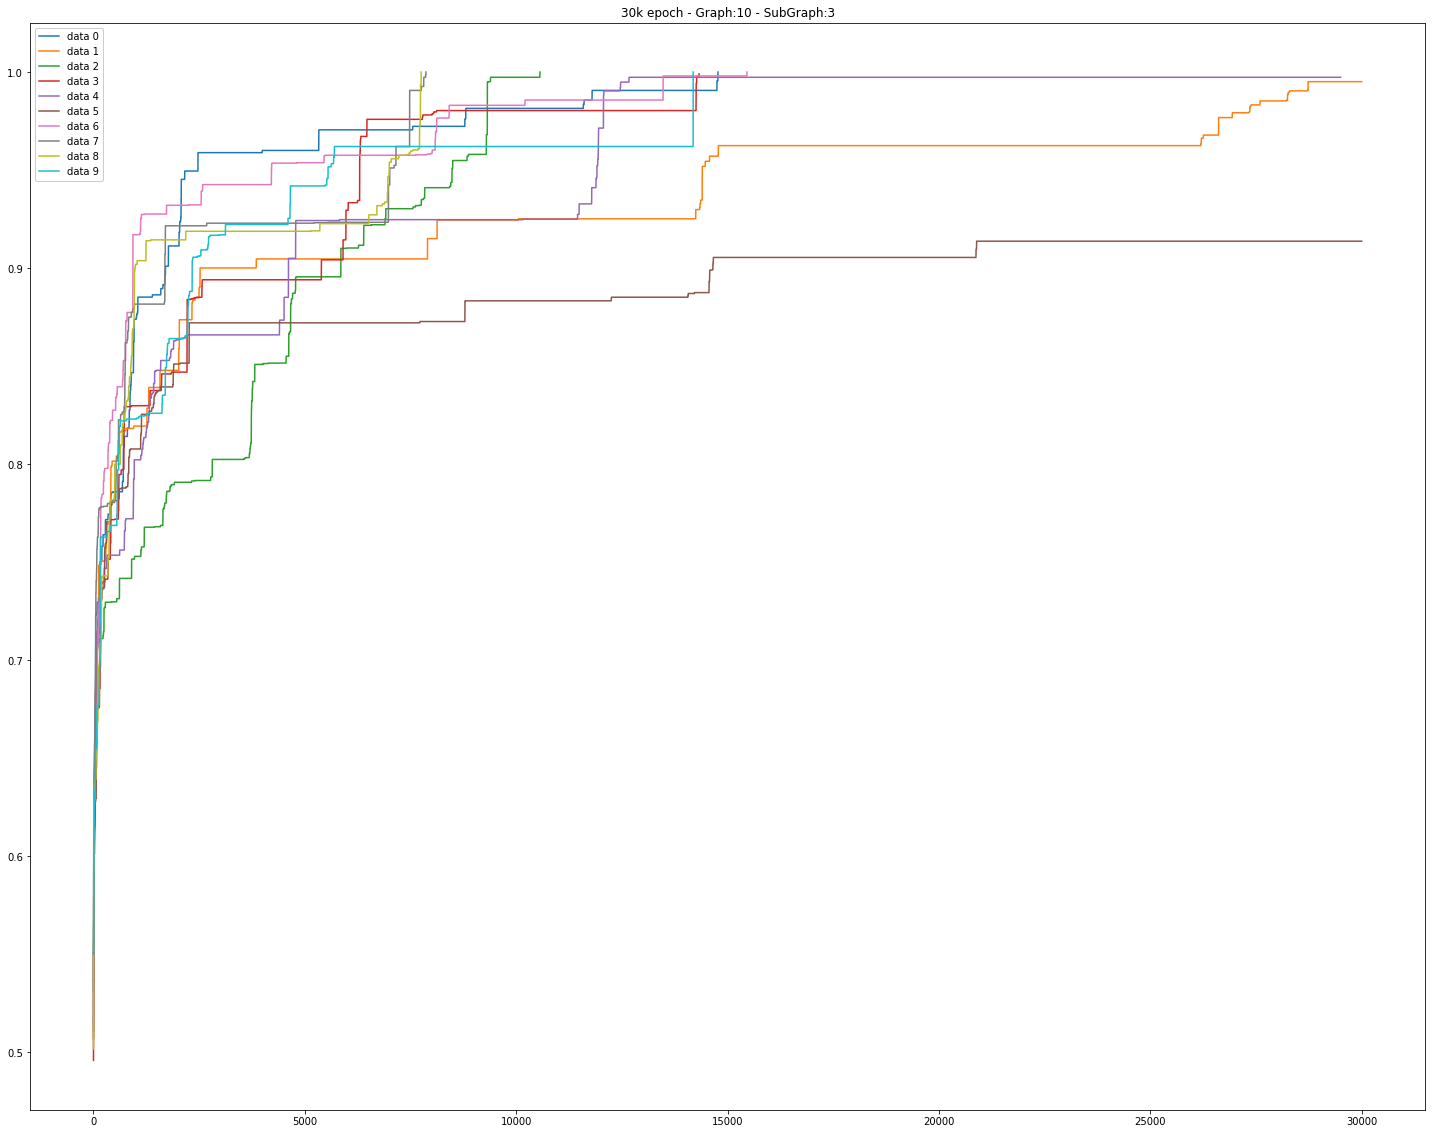

In [4]:
#plt.plot(y)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

plt.plot(df_0[1],label='data 0')
plt.plot(df_1[1],label='data 1')
plt.plot(df_2[1],label='data 2')
plt.plot(df_3[1],label='data 3')
plt.plot(df_4[1],label='data 4')
plt.plot(df_5[1],label='data 5')
plt.plot(df_6[1],label='data 6')
plt.plot(df_7[1],label='data 7')
plt.plot(df_8[1],label='data 8')
plt.plot(df_9[1],label='data 9')

plt.title("30k epoch - Graph:10 - SubGraph:3")

plt.legend(framealpha=1, frameon=True);

# Matrices de confusion

In [5]:
def df_Y2Ypredict(ruta):
    f = open(ruta)
    lines = f.readlines()
    num_epocas = int(str(lines[2][:-1]).split(' ')[-1]) #
    performance_train = float(str(lines[3]).split(' ')[-1])#
    performance_evalu = float(str(lines[4]).split(' ')[-1])#
    df_y_yPredict = pd.DataFrame([str(lines[8:-5][i]).split('\t') for i in range(len(lines[8:-5]))])
    temp = df_y_yPredict[4]
    temp = [int(temp[i]) for i in range(len(temp))]
    df_y_yPredict[4] = temp#
    accuracy = float(str(lines[-4]).split(' ')[-1])#
    df_y_yPredict = df_y_yPredict[[1,2,3,4]]
    df_y_yPredict.columns = ['v_input','v_predict','v_output','error']
    return num_epocas,performance_train, performance_evalu, df_y_yPredict, accuracy
    

## dataset 0 - GRAPH:10 -> SUBGRAPH:6

### Matriz de confusion - `Train`

,Name,Value
0,epocas,14773.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


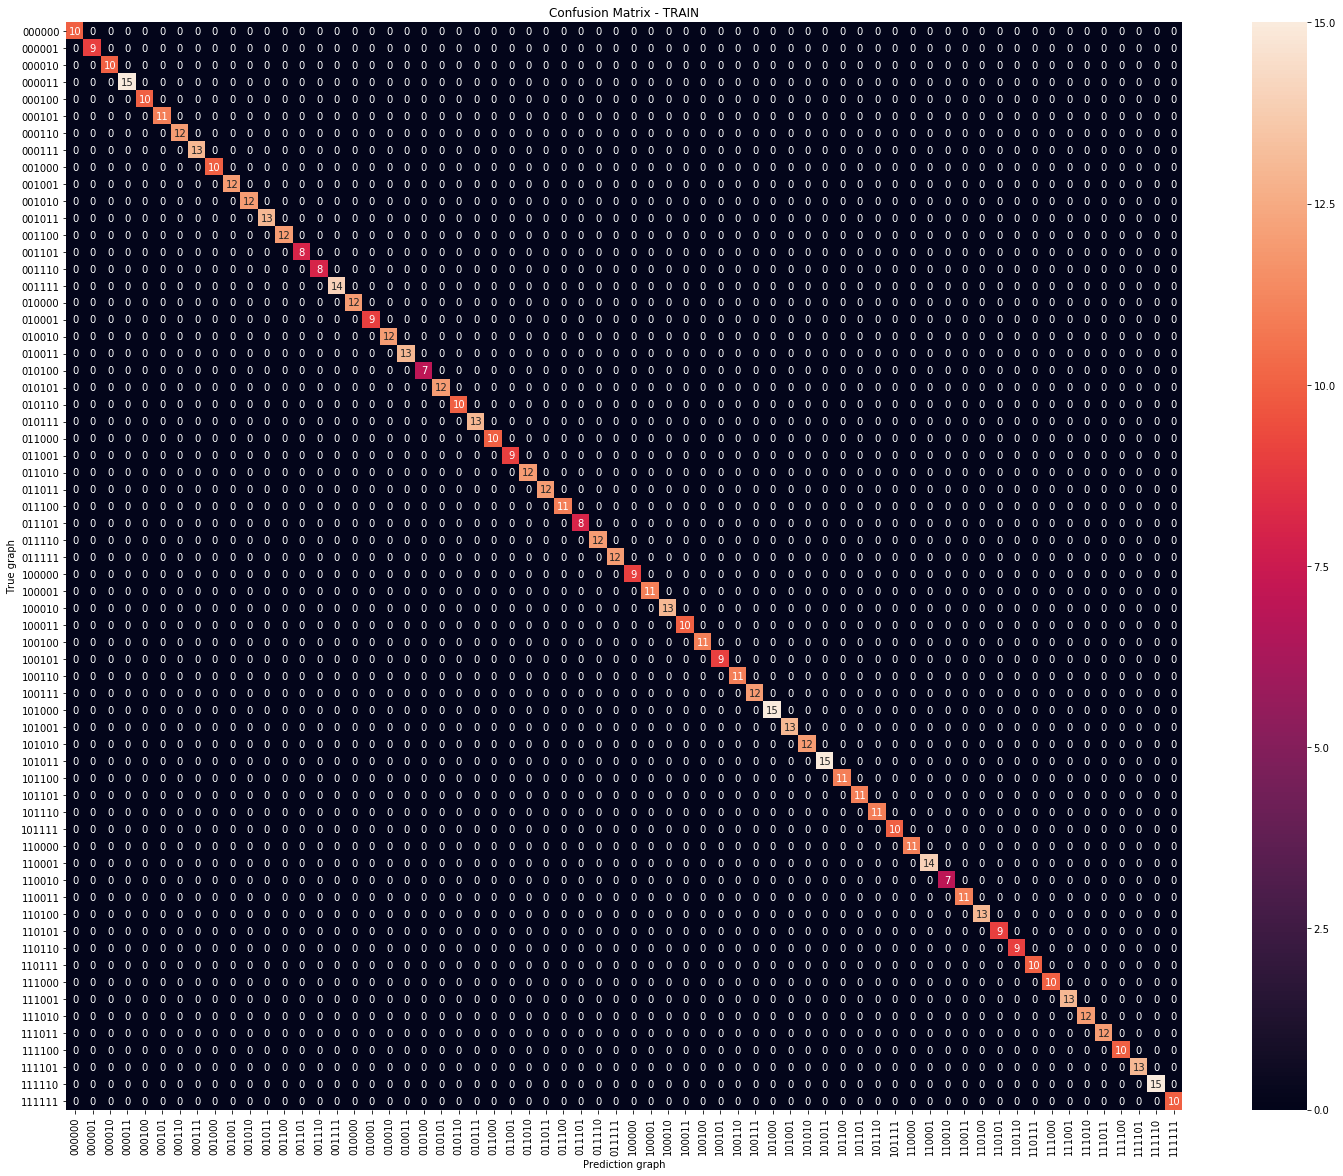

In [6]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset0/result_param10-6-i2-train0.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical');
ax.yaxis.set_ticklabels(labels,rotation='horizontal');






In [7]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       1.00      1.00      1.00        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

### Matriz de confusion - `Test`

,Name,Value
0,epocas,14773.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


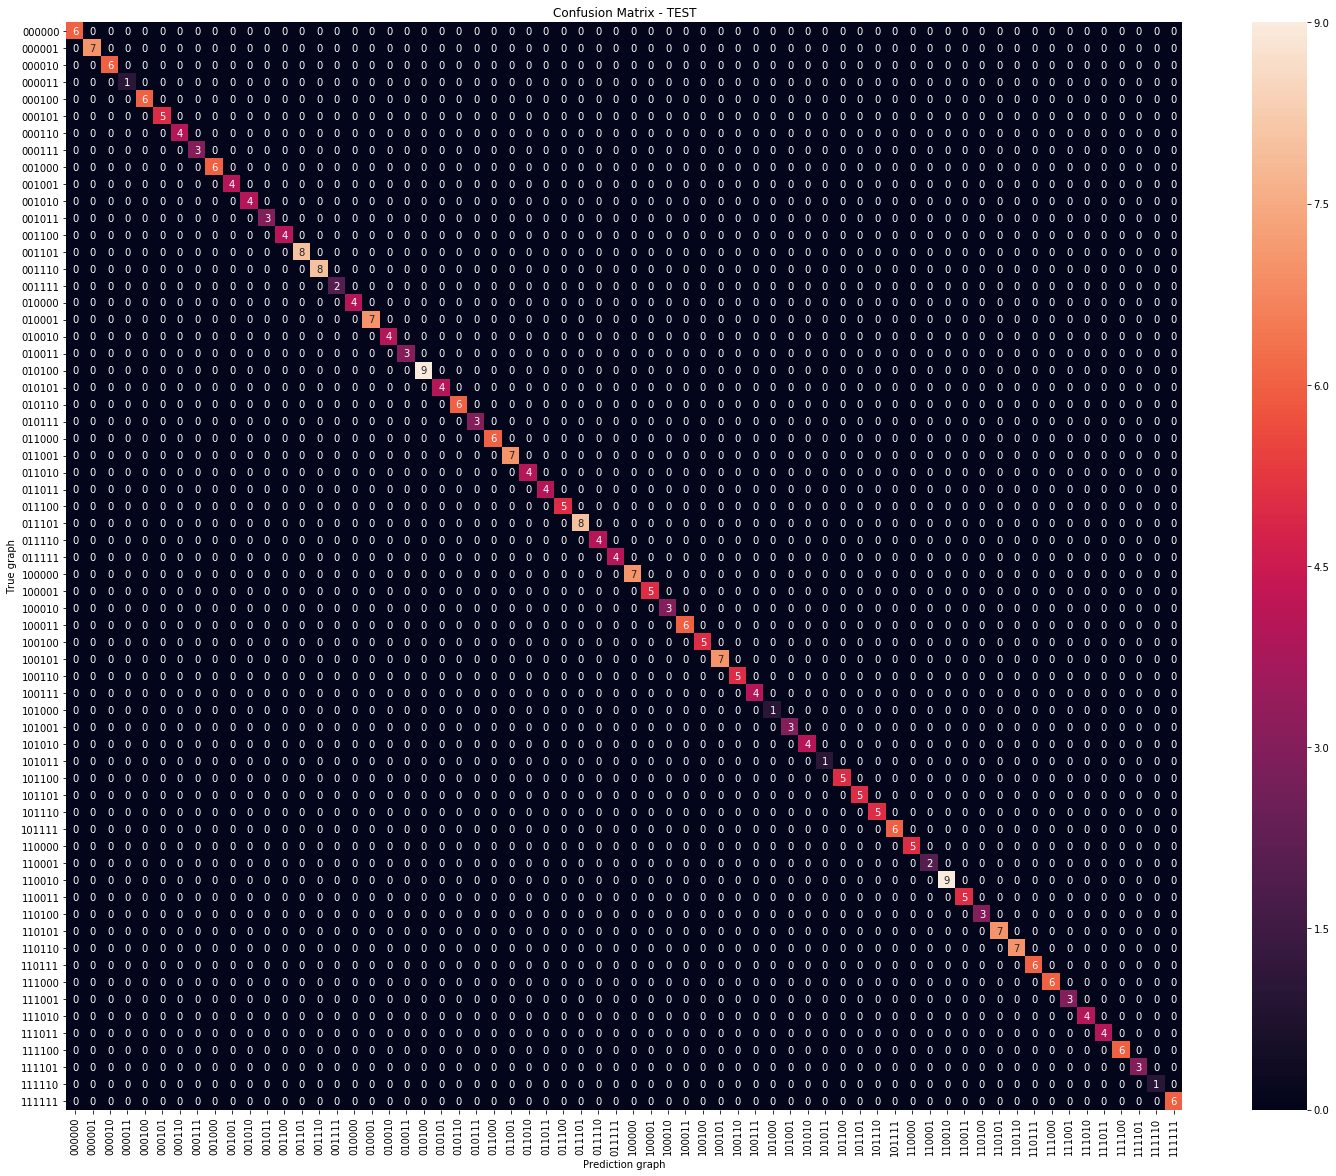

In [8]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset0/result_param10-6-i2-test0.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');






In [9]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))




******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       1.00      1.00      1.00         6
      000101       1.00      1.00      1.00         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      

## dataset 1 - GRAPH:10 -> SUBGRAPH:6

,Name,Value
0,epocas,30000.000000
1,pTrain,0.995084
2,pHamm,0.995084
3,ac,0.969274


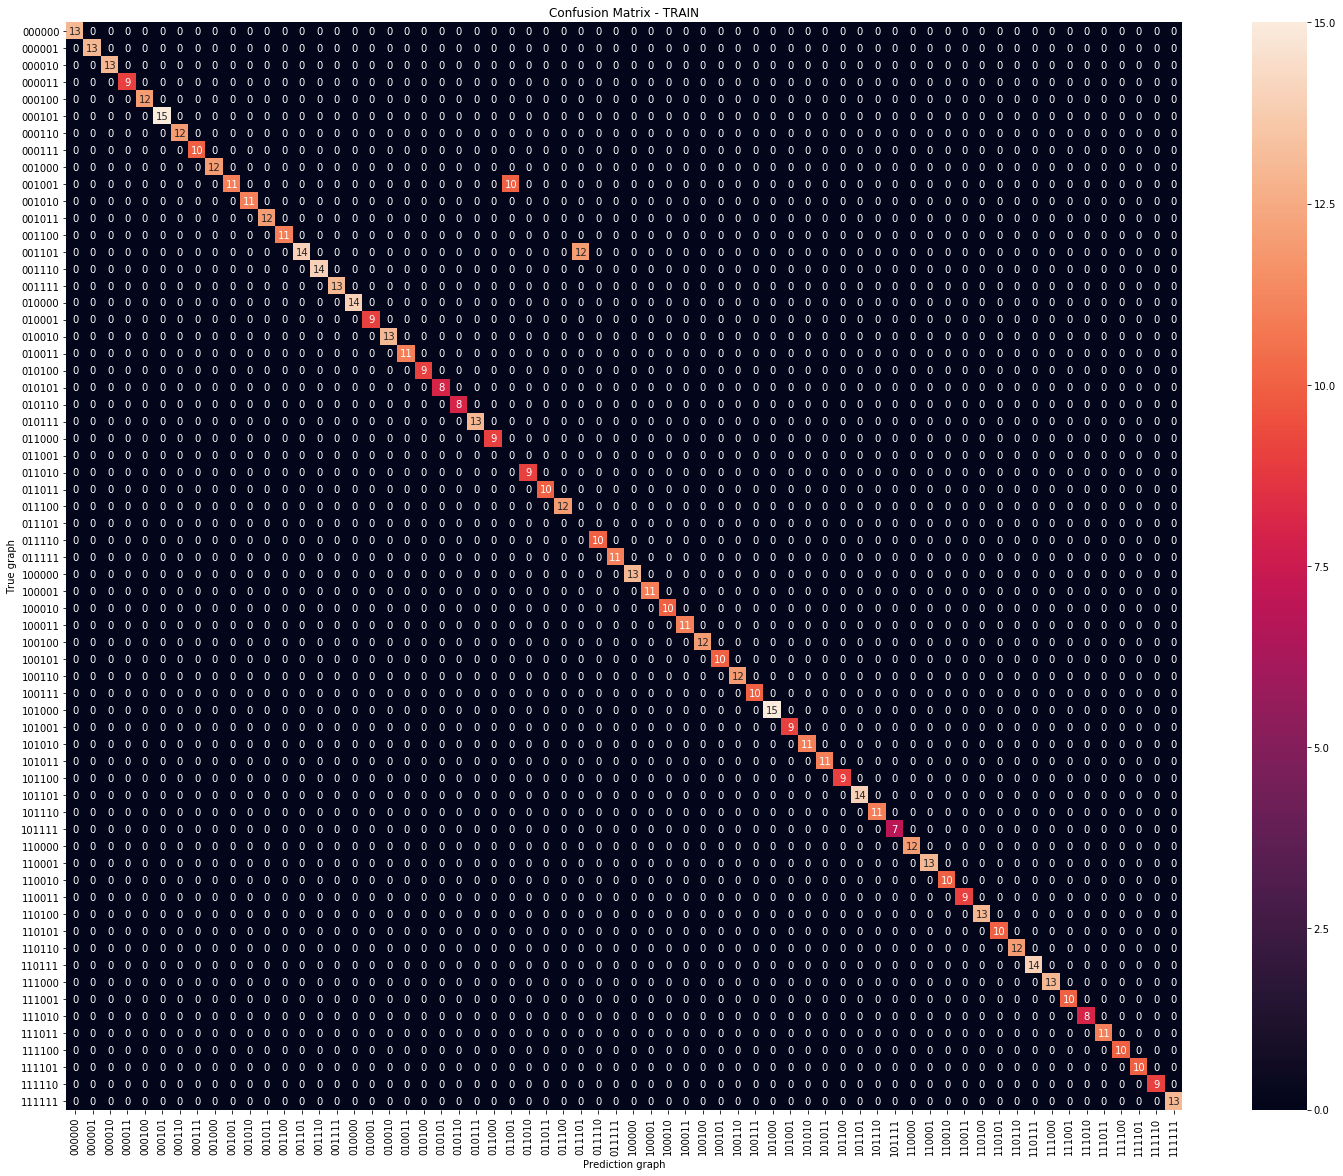

In [10]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset1/result_param10-6-i2-train1.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');






In [11]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        13
      000001       1.00      1.00      1.00        13
      000010       1.00      1.00      1.00        13
      000011       1.00      1.00      1.00         9
      000100       1.00      1.00      1.00        12
      000101       1.00      1.00      1.00        15
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        10
      001000       1.00      1.00      1.00        12
      001001       1.00      0.52      0.69        21
      001010       1.00      1.00      1.00        11
      001011       1.00      1.00      1.00        12
      001100       1.00      1.00      1.00        11
      001101       1.00      0.54      0.70        26
      001110       1.00      1.00      1.00        14
      001111       1.00      1.00      1.00        13
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,Name,Value
0,epocas,30000.000000
1,pTrain,0.995084
2,pHamm,0.994805
3,ac,0.967532


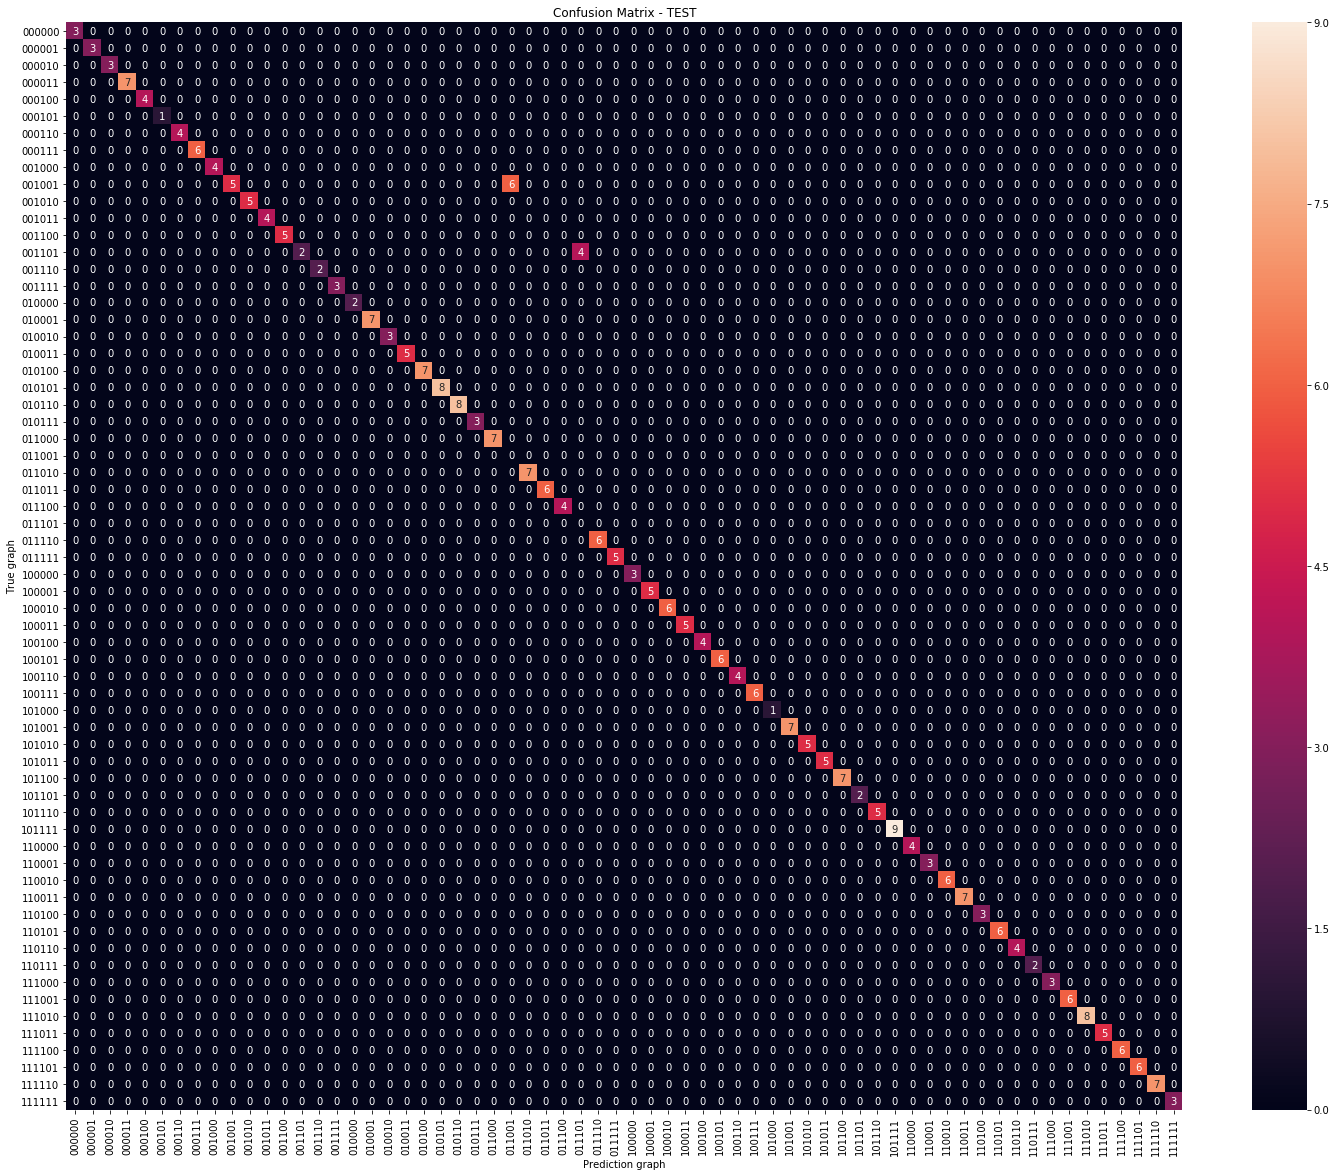

In [12]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset1/result_param10-6-i2-test1.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');






In [13]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         3
      000001       1.00      1.00      1.00         3
      000010       1.00      1.00      1.00         3
      000011       1.00      1.00      1.00         7
      000100       1.00      1.00      1.00         4
      000101       1.00      1.00      1.00         1
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         6
      001000       1.00      1.00      1.00         4
      001001       1.00      0.45      0.62        11
      001010       1.00      1.00      1.00         5
      001011       1.00      1.00      1.00         4
      001100       1.00      1.00      1.00         5
      001101       1.00      0.33      0.50         6
      001110       1.00      1.00      1.00         2
      001111       1.00      1.00      1.00         3
      010000       1.00      

## dataset 2 - GRAPH:10 -> SUBGRAPH:6

,Name,Value
0,epocas,10564.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


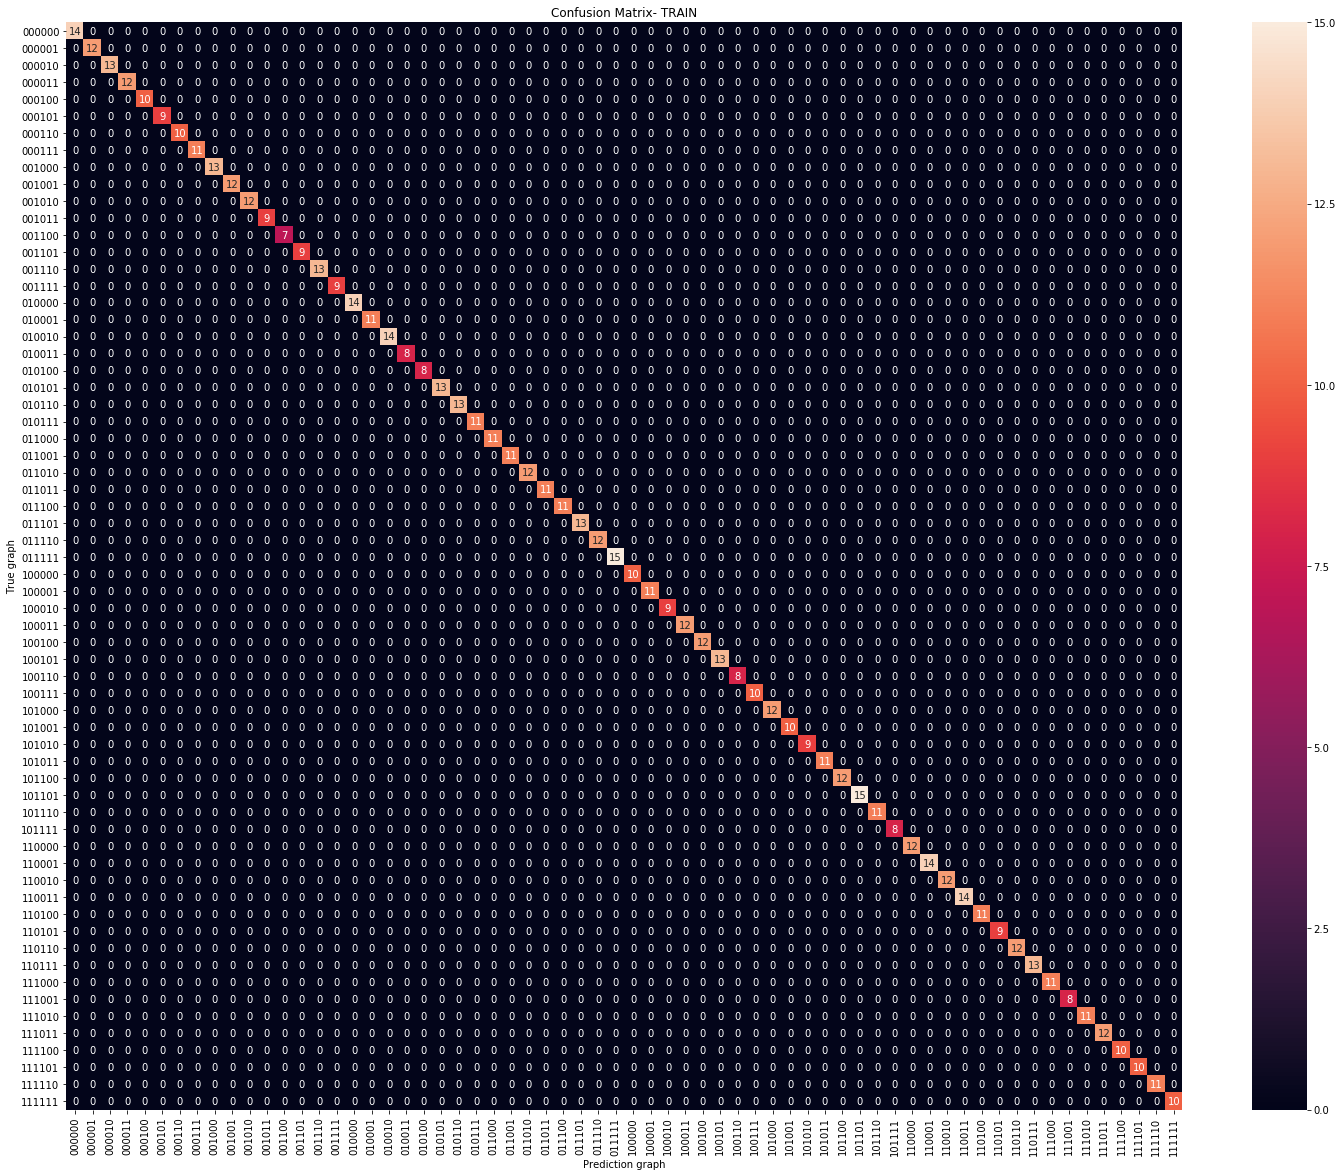

In [14]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset2/result_param10-6-i2-train2.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix- TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [15]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        14
      000001       1.00      1.00      1.00        12
      000010       1.00      1.00      1.00        13
      000011       1.00      1.00      1.00        12
      000100       1.00      1.00      1.00        10
      000101       1.00      1.00      1.00         9
      000110       1.00      1.00      1.00        10
      000111       1.00      1.00      1.00        11
      001000       1.00      1.00      1.00        13
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00         9
      001100       1.00      1.00      1.00         7
      001101       1.00      1.00      1.00         9
      001110       1.00      1.00      1.00        13
      001111       1.00      1.00      1.00         9
      010000       1.00     

,Name,Value
0,epocas,10564.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


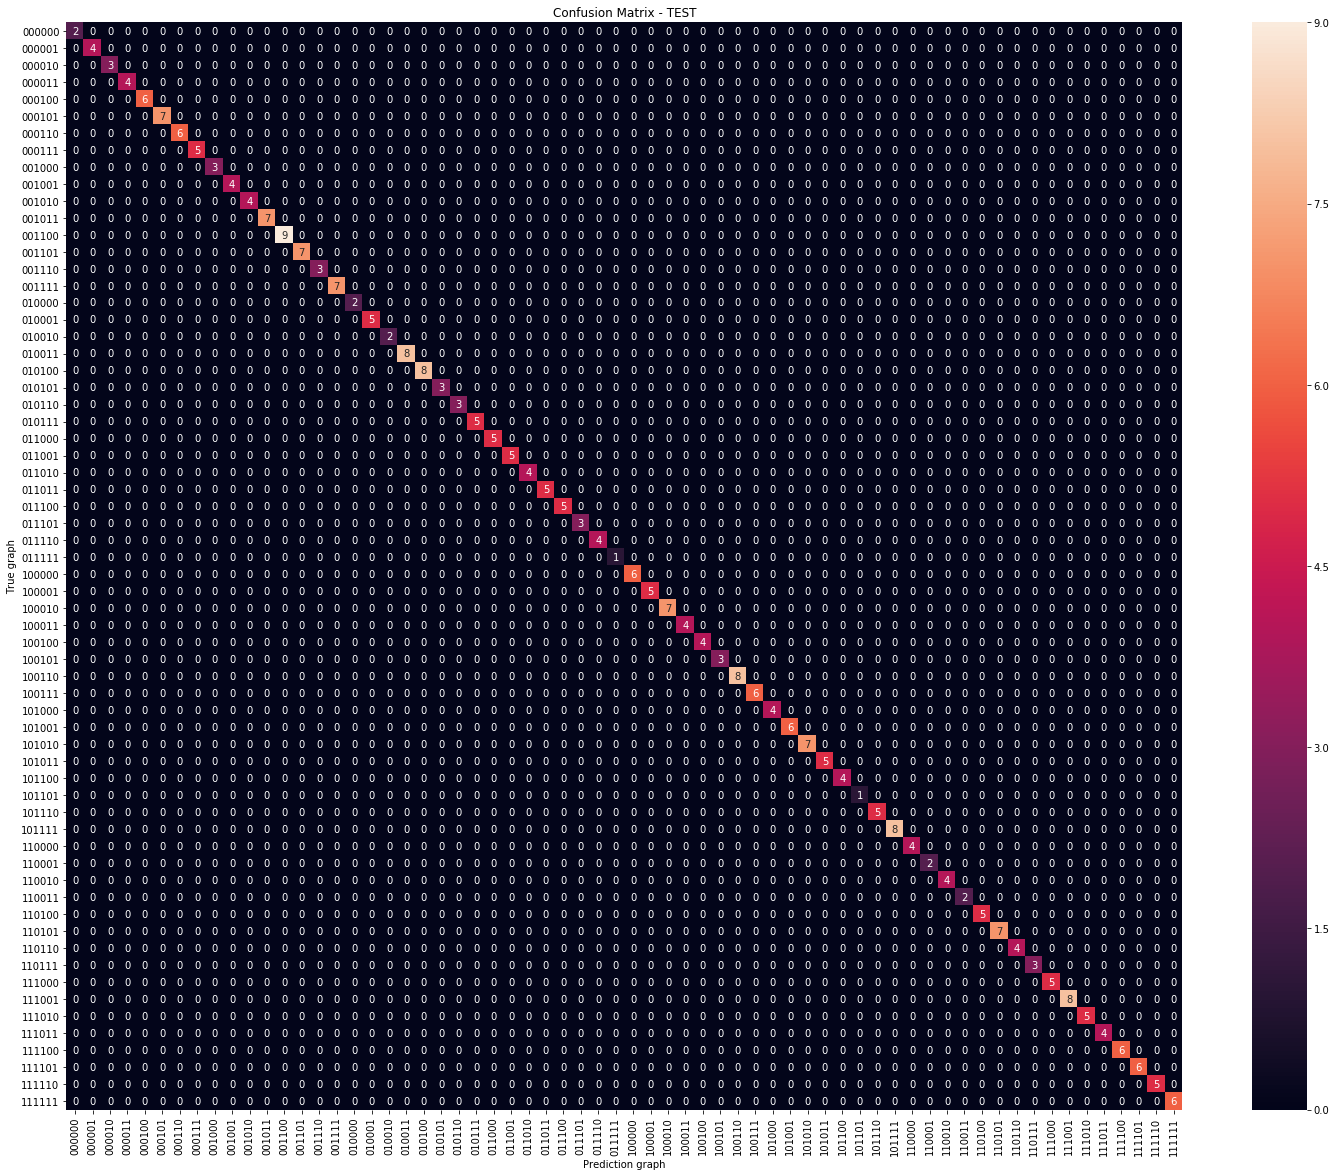

In [16]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset2/result_param10-6-i2-test2.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [17]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         2
      000001       1.00      1.00      1.00         4
      000010       1.00      1.00      1.00         3
      000011       1.00      1.00      1.00         4
      000100       1.00      1.00      1.00         6
      000101       1.00      1.00      1.00         7
      000110       1.00      1.00      1.00         6
      000111       1.00      1.00      1.00         5
      001000       1.00      1.00      1.00         3
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         7
      001100       1.00      1.00      1.00         9
      001101       1.00      1.00      1.00         7
      001110       1.00      1.00      1.00         3
      001111       1.00      1.00      1.00         7
      010000       1.00      

## dataset 3 - GRAPH:10 -> SUBGRAPH:6

,Name,Value
0,epocas,14327.000000
1,pTrain,0.999078
2,pHamm,0.999078
3,ac,0.997207


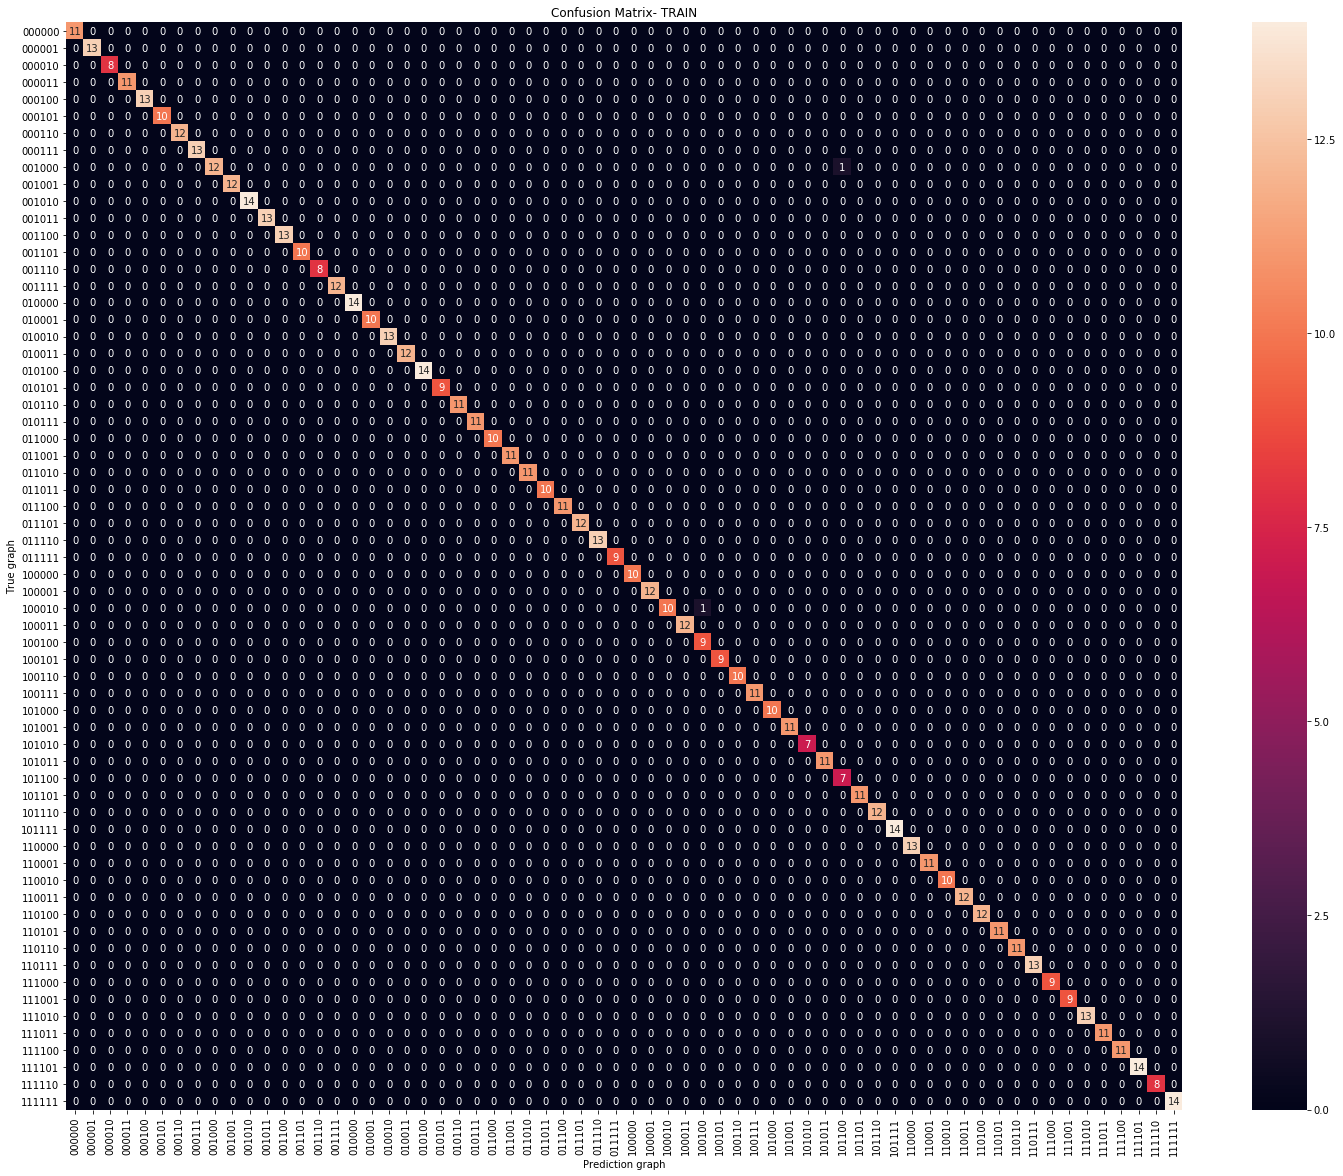

In [18]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset3/result_param10-6-i2-train3.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix- TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [19]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        11
      000001       1.00      1.00      1.00        13
      000010       1.00      1.00      1.00         8
      000011       1.00      1.00      1.00        11
      000100       1.00      1.00      1.00        13
      000101       1.00      1.00      1.00        10
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      0.92      0.96        13
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        14
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        13
      001101       1.00      1.00      1.00        10
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        12
      010000       1.00     

,Name,Value
0,epocas,14327.000000
1,pTrain,0.999078
2,pHamm,0.997305
3,ac,0.993506


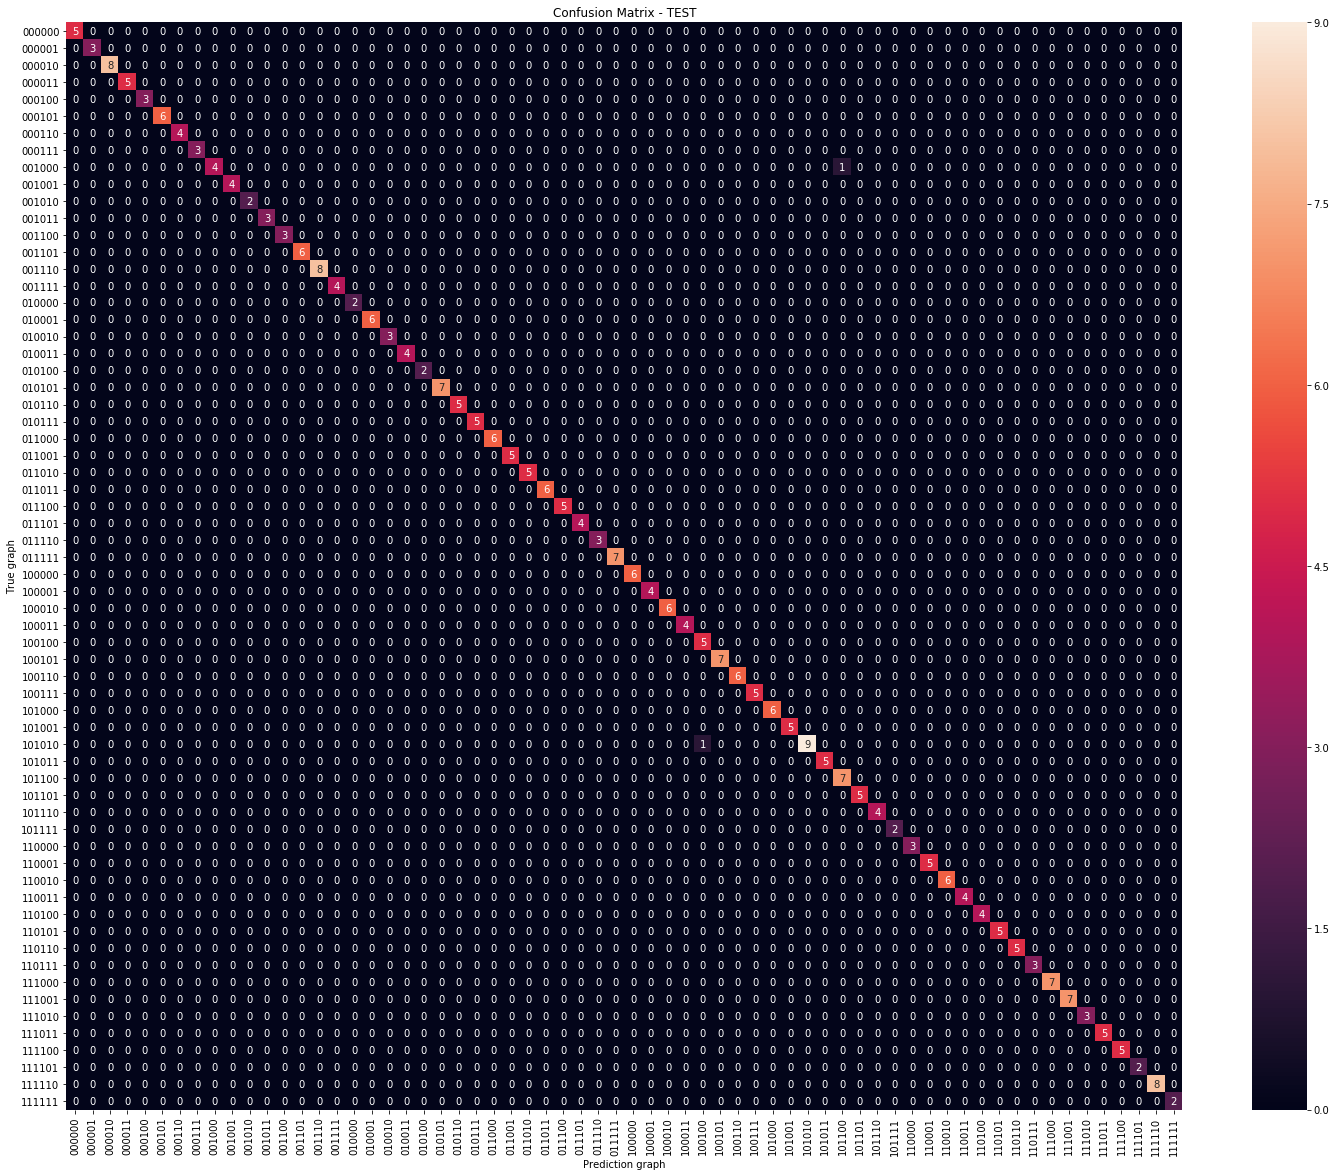

In [20]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset3/result_param10-6-i2-test3.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [21]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         5
      000001       1.00      1.00      1.00         3
      000010       1.00      1.00      1.00         8
      000011       1.00      1.00      1.00         5
      000100       1.00      1.00      1.00         3
      000101       1.00      1.00      1.00         6
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      0.80      0.89         5
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         2
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         3
      001101       1.00      1.00      1.00         6
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         4
      010000       1.00      

## dataset 4 - GRAPH:10 -> SUBGRAPH:6

,Name,Value
0,epocas,29588.000000
1,pTrain,0.997318
2,pHamm,0.997318
3,ac,0.983240


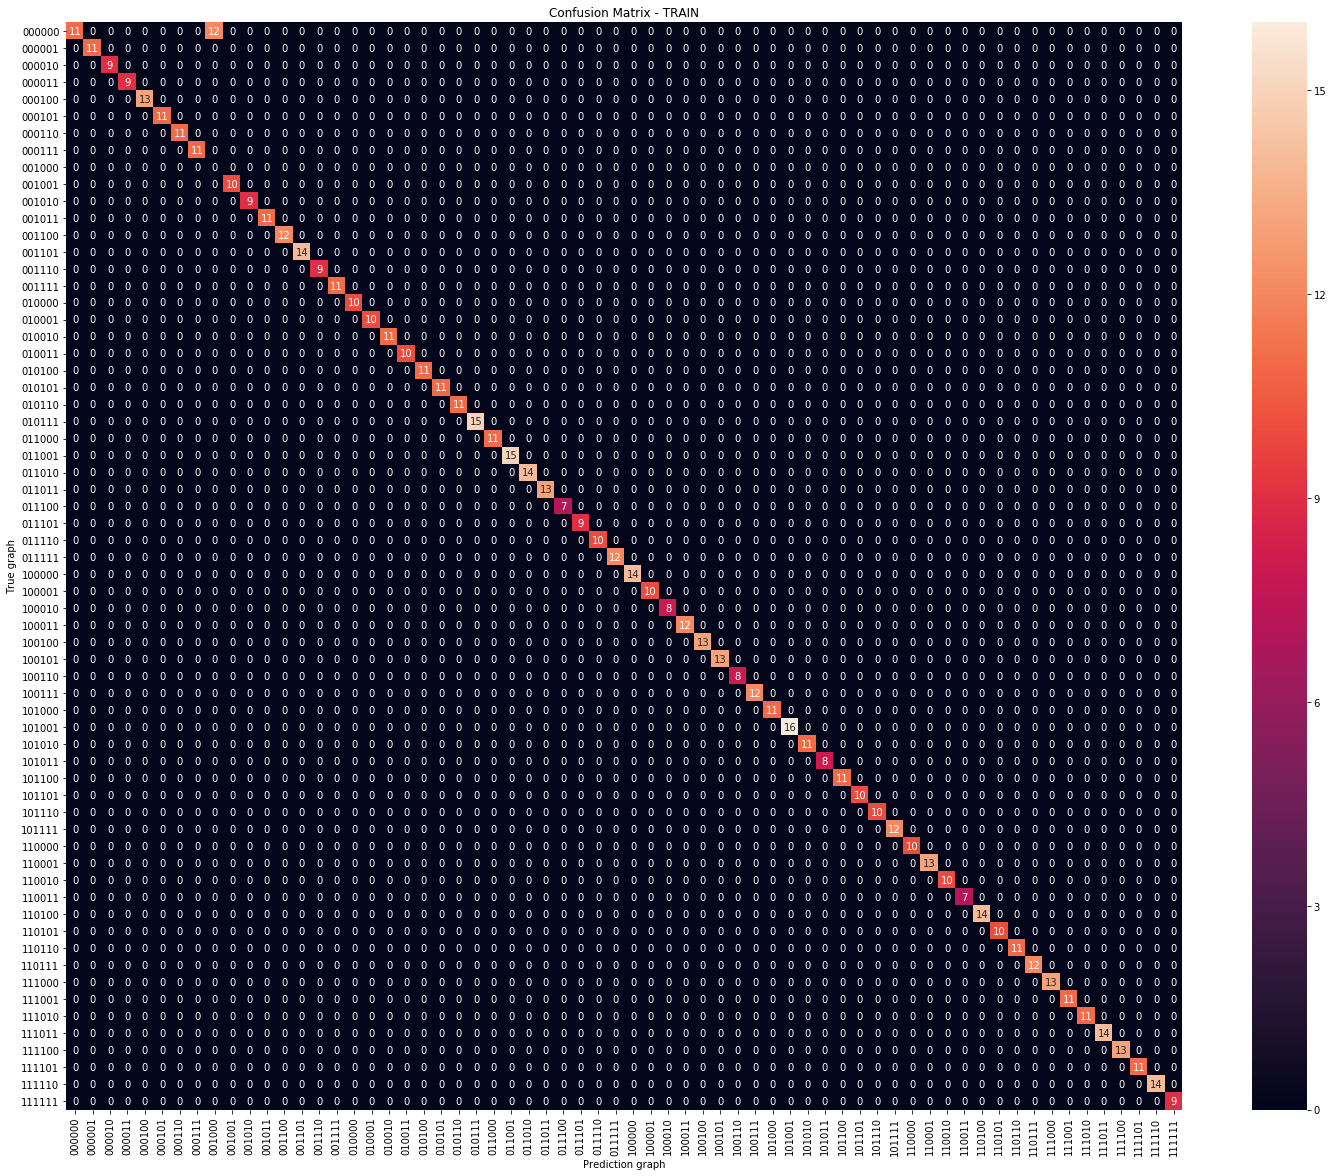

In [22]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset4/result_param10-6-i2-train4.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [23]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      0.48      0.65        23
      000001       1.00      1.00      1.00        11
      000010       1.00      1.00      1.00         9
      000011       1.00      1.00      1.00         9
      000100       1.00      1.00      1.00        13
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        11
      000111       1.00      1.00      1.00        11
      001000       0.00      0.00      0.00         0
      001001       1.00      1.00      1.00        10
      001010       1.00      1.00      1.00         9
      001011       1.00      1.00      1.00        11
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00        14
      001110       1.00      1.00      1.00         9
      001111       1.00      1.00      1.00        11
      010000       1.00     

,Name,Value
0,epocas,29588.000000
1,pTrain,0.997318
2,pHamm,0.997922
3,ac,0.987013


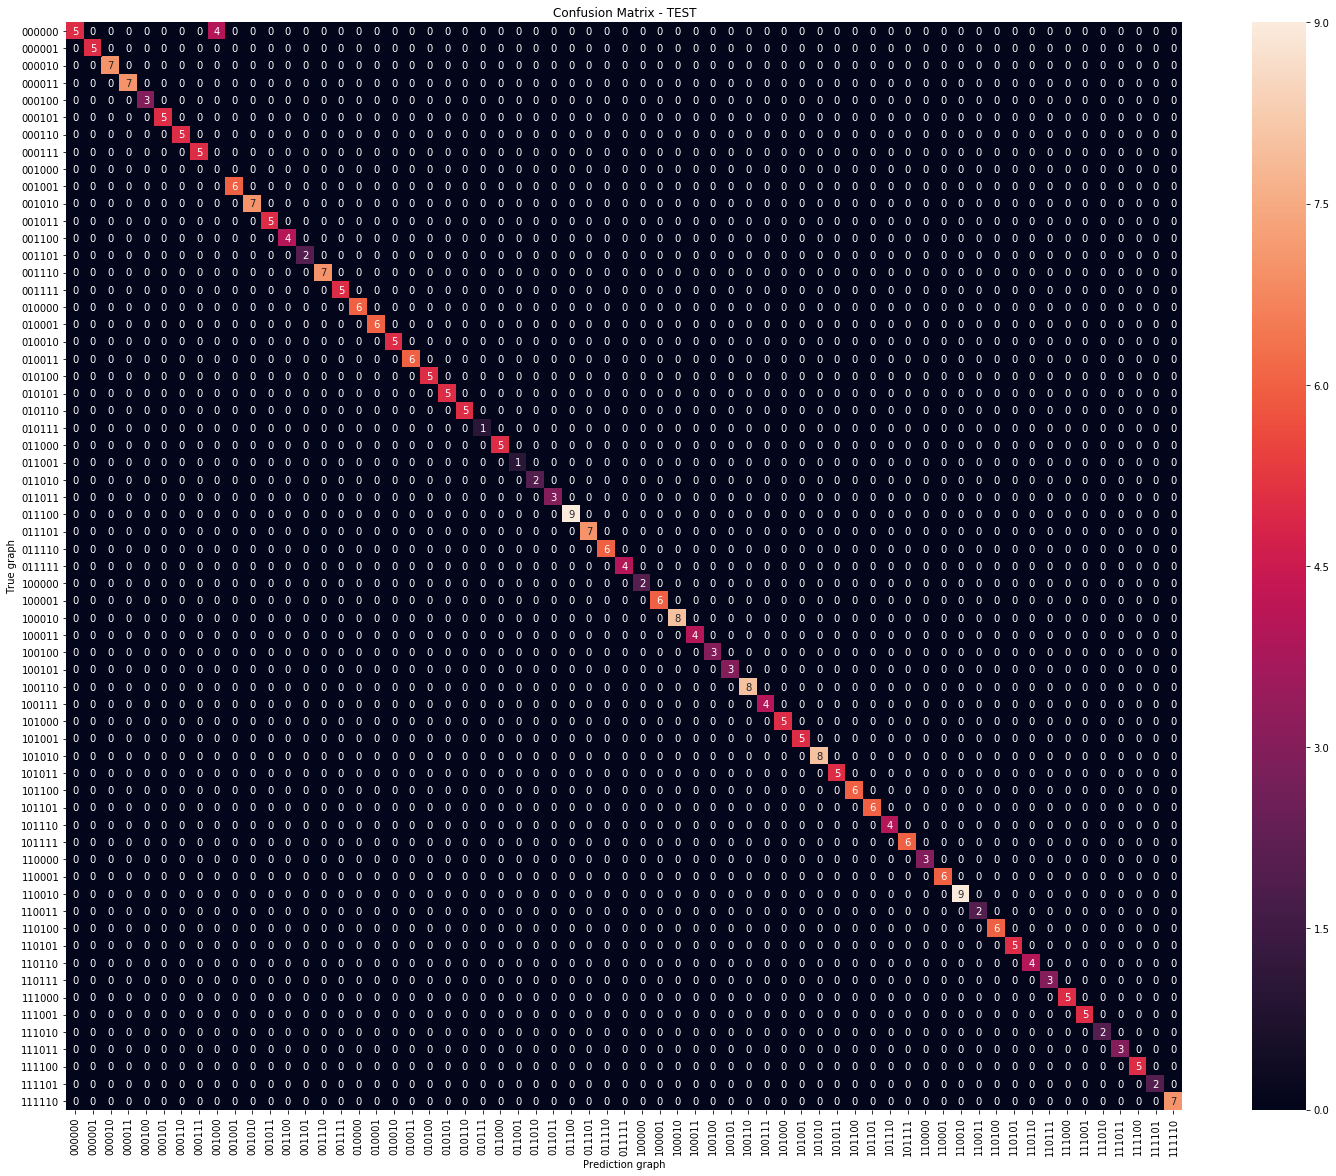

In [24]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset4/result_param10-6-i2-test4.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [25]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      0.56      0.71         9
      000001       1.00      1.00      1.00         5
      000010       1.00      1.00      1.00         7
      000011       1.00      1.00      1.00         7
      000100       1.00      1.00      1.00         3
      000101       1.00      1.00      1.00         5
      000110       1.00      1.00      1.00         5
      000111       1.00      1.00      1.00         5
      001000       0.00      0.00      0.00         0
      001001       1.00      1.00      1.00         6
      001010       1.00      1.00      1.00         7
      001011       1.00      1.00      1.00         5
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         2
      001110       1.00      1.00      1.00         7
      001111       1.00      1.00      1.00         5
      010000       1.00      

## dataset 5 - GRAPH:10 -> SUBGRAPH:6

,Name,Value
0,epocas,30000.000000
1,pTrain,0.913715
2,pHamm,0.913715
3,ac,0.487430


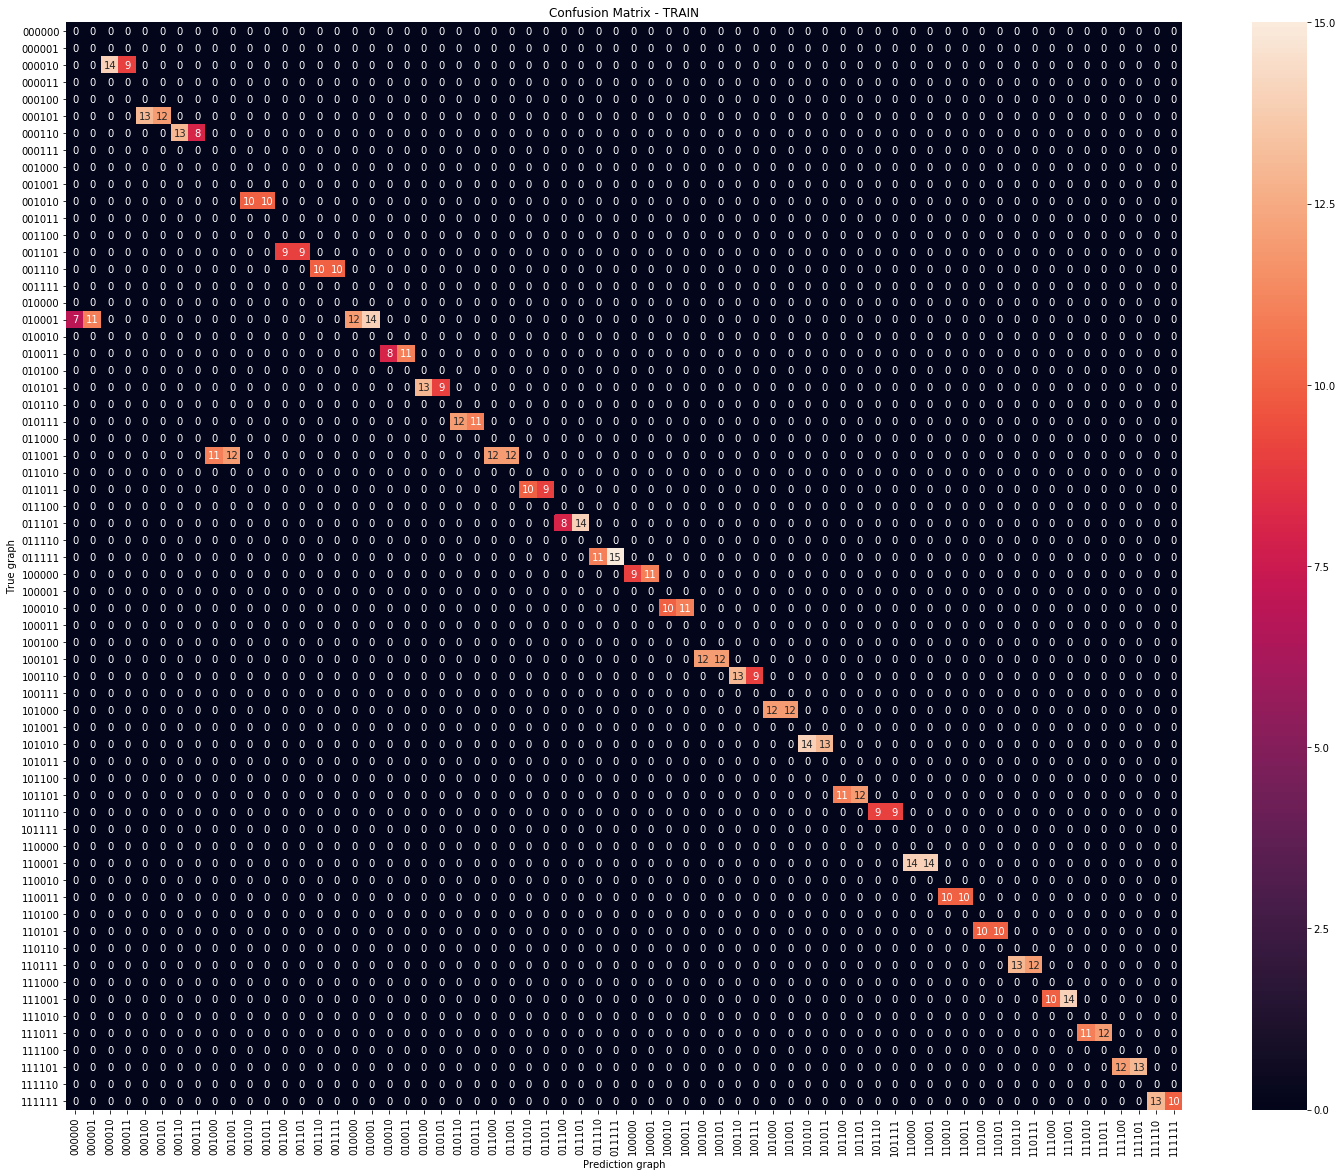

In [26]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset5/result_param10-6-i2-train5.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [27]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       0.00      0.00      0.00         0
      000001       0.00      0.00      0.00         0
      000010       1.00      0.61      0.76        23
      000011       0.00      0.00      0.00         0
      000100       0.00      0.00      0.00         0
      000101       1.00      0.48      0.65        25
      000110       1.00      0.62      0.76        21
      000111       0.00      0.00      0.00         0
      001000       0.00      0.00      0.00         0
      001001       0.00      0.00      0.00         0
      001010       1.00      0.50      0.67        20
      001011       0.00      0.00      0.00         0
      001100       0.00      0.00      0.00         0
      001101       1.00      0.50      0.67        18
      001110       1.00      0.50      0.67        20
      001111       0.00      0.00      0.00         0
      010000       0.00     

,Name,Value
0,epocas,30000.000000
1,pTrain,0.913715
2,pHamm,0.900325
3,ac,0.425325


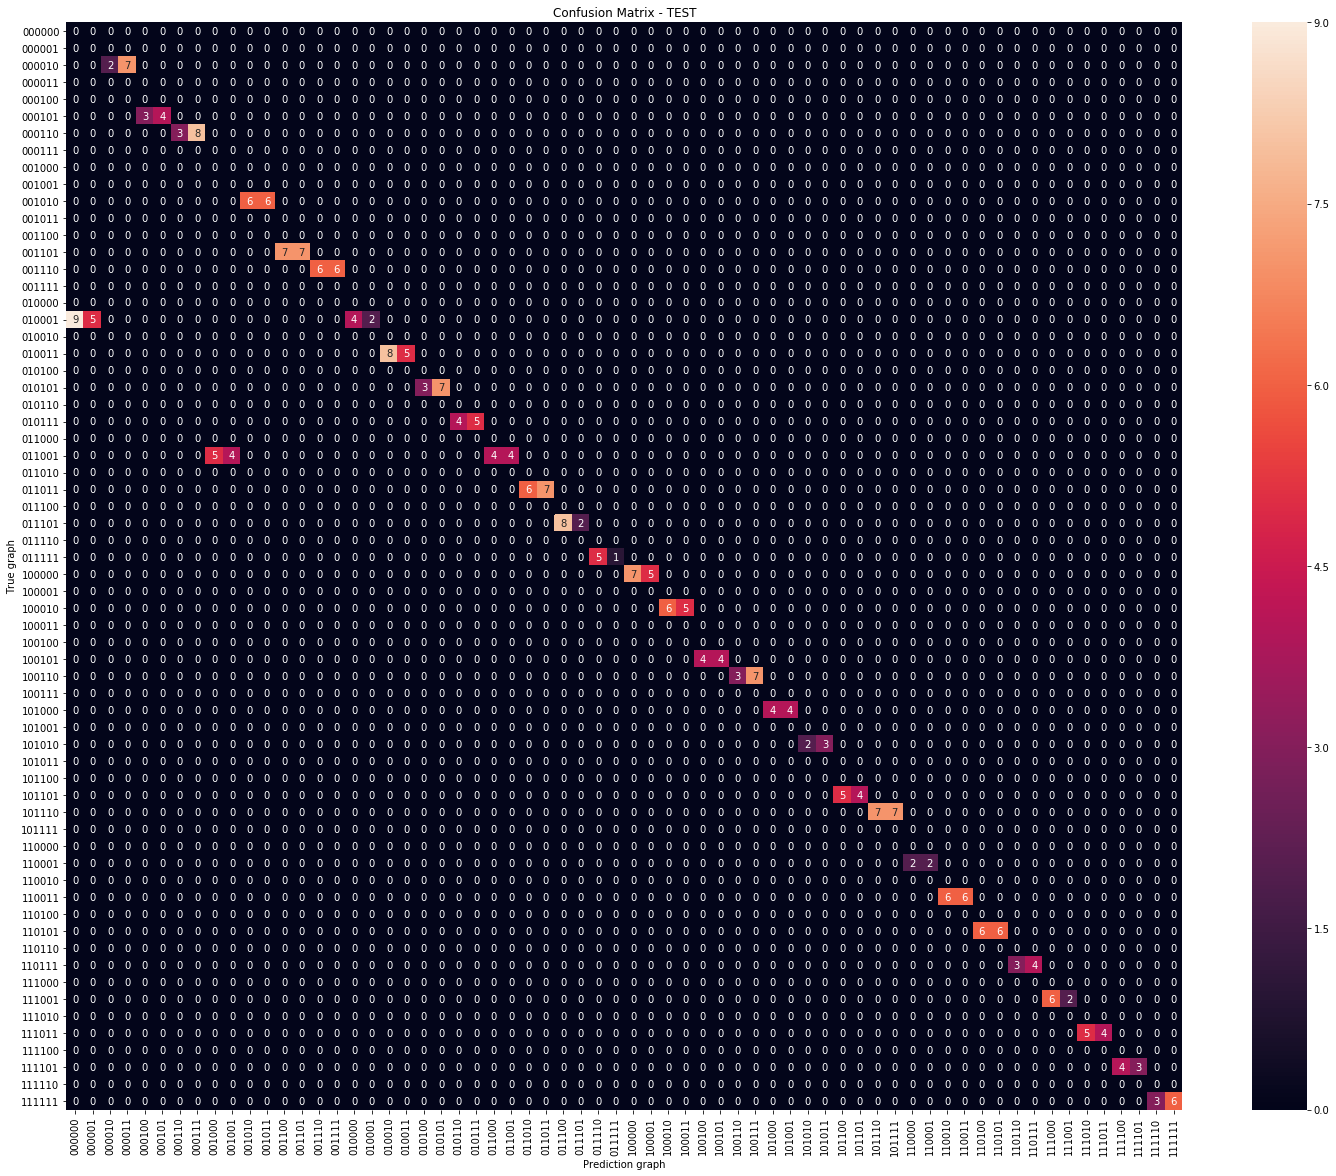

In [28]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset5/result_param10-6-i2-test5.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [29]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       0.00      0.00      0.00         0
      000001       0.00      0.00      0.00         0
      000010       1.00      0.22      0.36         9
      000011       0.00      0.00      0.00         0
      000100       0.00      0.00      0.00         0
      000101       1.00      0.57      0.73         7
      000110       1.00      0.27      0.43        11
      000111       0.00      0.00      0.00         0
      001000       0.00      0.00      0.00         0
      001001       0.00      0.00      0.00         0
      001010       1.00      0.50      0.67        12
      001011       0.00      0.00      0.00         0
      001100       0.00      0.00      0.00         0
      001101       1.00      0.50      0.67        14
      001110       1.00      0.50      0.67        12
      001111       0.00      0.00      0.00         0
      010000       0.00      

## dataset 6 - GRAPH:10 -> SUBGRAPH:6

,Name,Value
0,epocas,15459.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


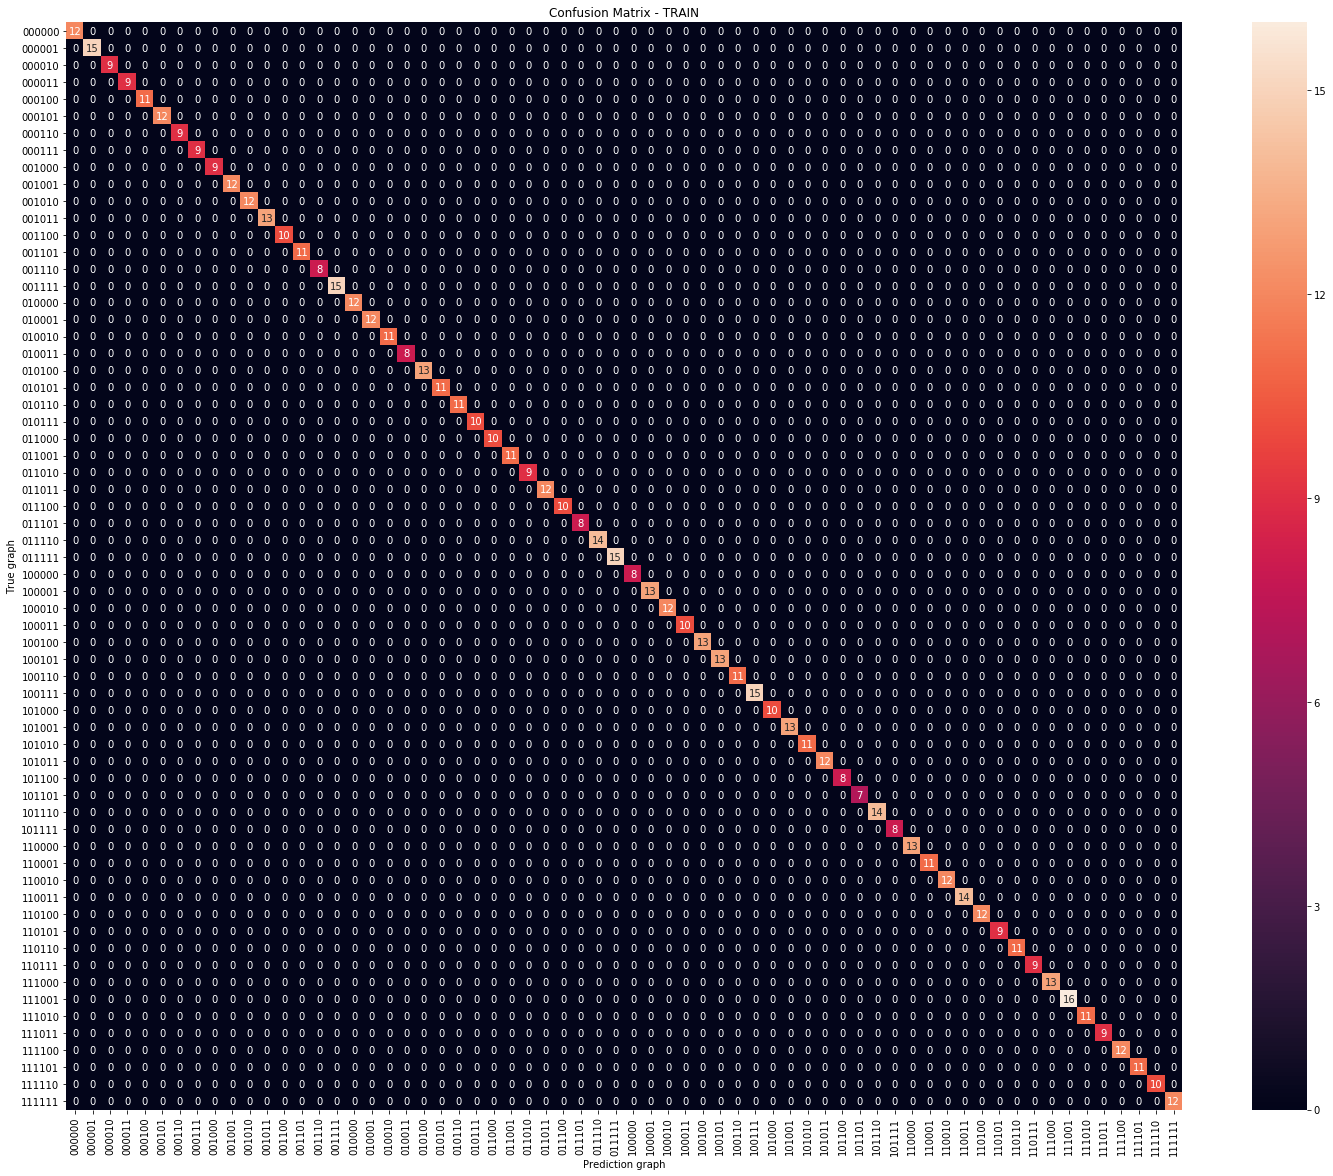

In [30]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset6/result_param10-6-i2-train6.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [31]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        12
      000001       1.00      1.00      1.00        15
      000010       1.00      1.00      1.00         9
      000011       1.00      1.00      1.00         9
      000100       1.00      1.00      1.00        11
      000101       1.00      1.00      1.00        12
      000110       1.00      1.00      1.00         9
      000111       1.00      1.00      1.00         9
      001000       1.00      1.00      1.00         9
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        10
      001101       1.00      1.00      1.00        11
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        15
      010000       1.00     

,Name,Value
0,epocas,15459.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


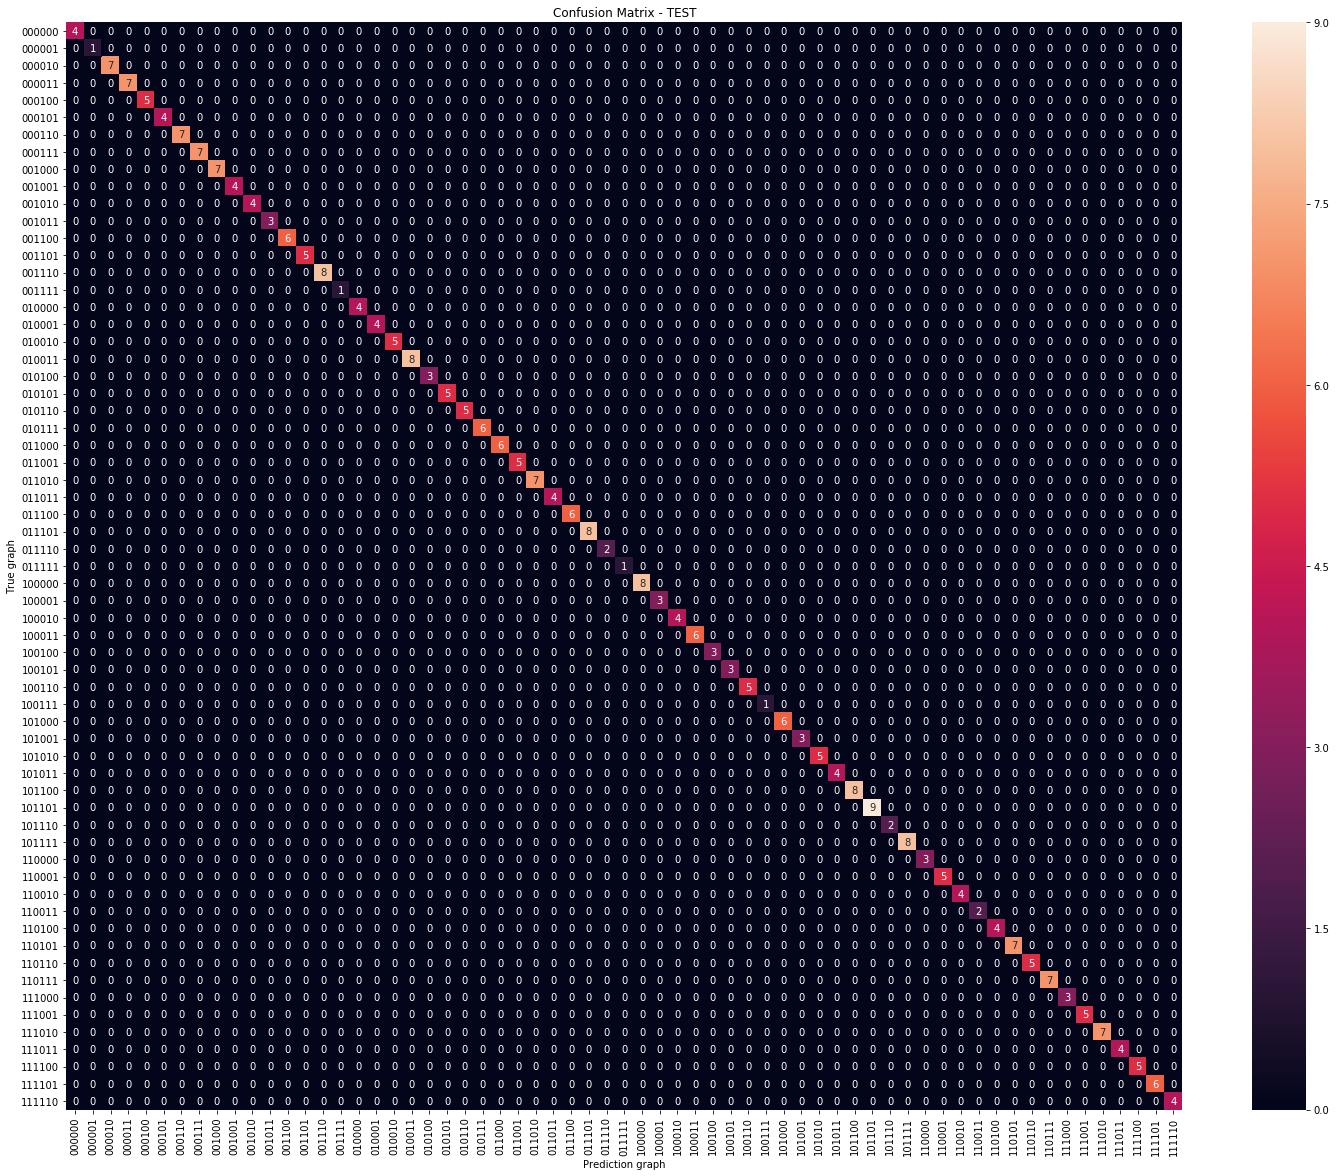

In [32]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset6/result_param10-6-i2-test6.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [33]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         4
      000001       1.00      1.00      1.00         1
      000010       1.00      1.00      1.00         7
      000011       1.00      1.00      1.00         7
      000100       1.00      1.00      1.00         5
      000101       1.00      1.00      1.00         4
      000110       1.00      1.00      1.00         7
      000111       1.00      1.00      1.00         7
      001000       1.00      1.00      1.00         7
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         6
      001101       1.00      1.00      1.00         5
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         1
      010000       1.00      

## dataset 7 - GRAPH:10 -> SUBGRAPH:6

,Name,Value
0,epocas,7866.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


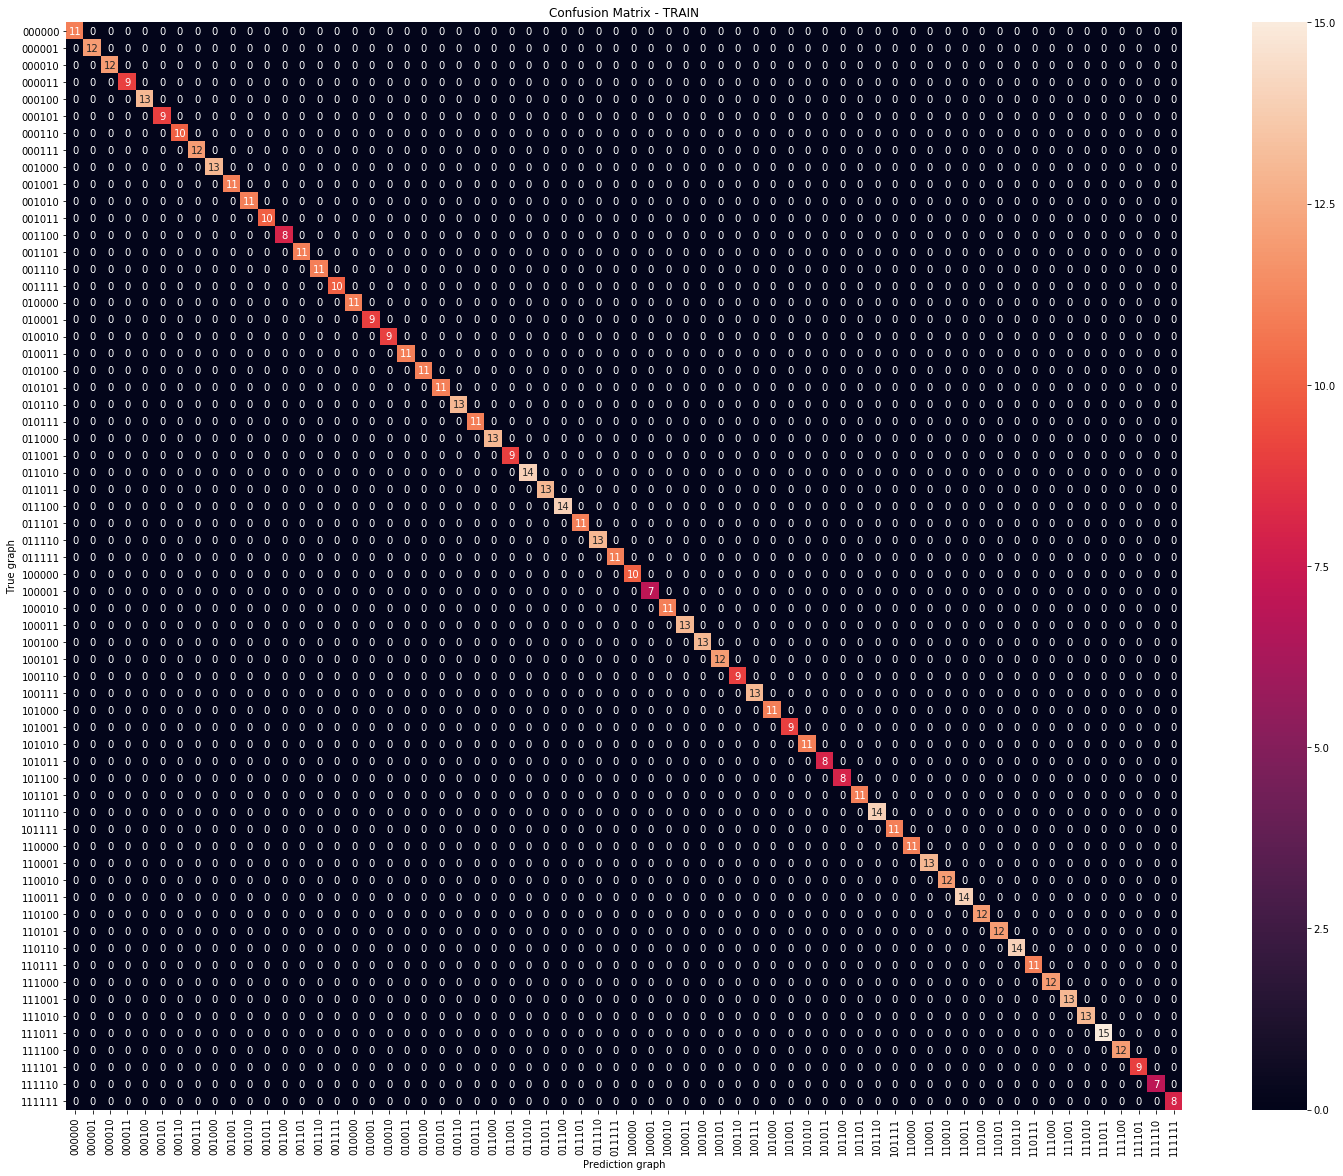

In [34]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset7/result_param10-6-i2-train7.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [35]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        11
      000001       1.00      1.00      1.00        12
      000010       1.00      1.00      1.00        12
      000011       1.00      1.00      1.00         9
      000100       1.00      1.00      1.00        13
      000101       1.00      1.00      1.00         9
      000110       1.00      1.00      1.00        10
      000111       1.00      1.00      1.00        12
      001000       1.00      1.00      1.00        13
      001001       1.00      1.00      1.00        11
      001010       1.00      1.00      1.00        11
      001011       1.00      1.00      1.00        10
      001100       1.00      1.00      1.00         8
      001101       1.00      1.00      1.00        11
      001110       1.00      1.00      1.00        11
      001111       1.00      1.00      1.00        10
      010000       1.00     

,Name,Value
0,epocas,7866.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


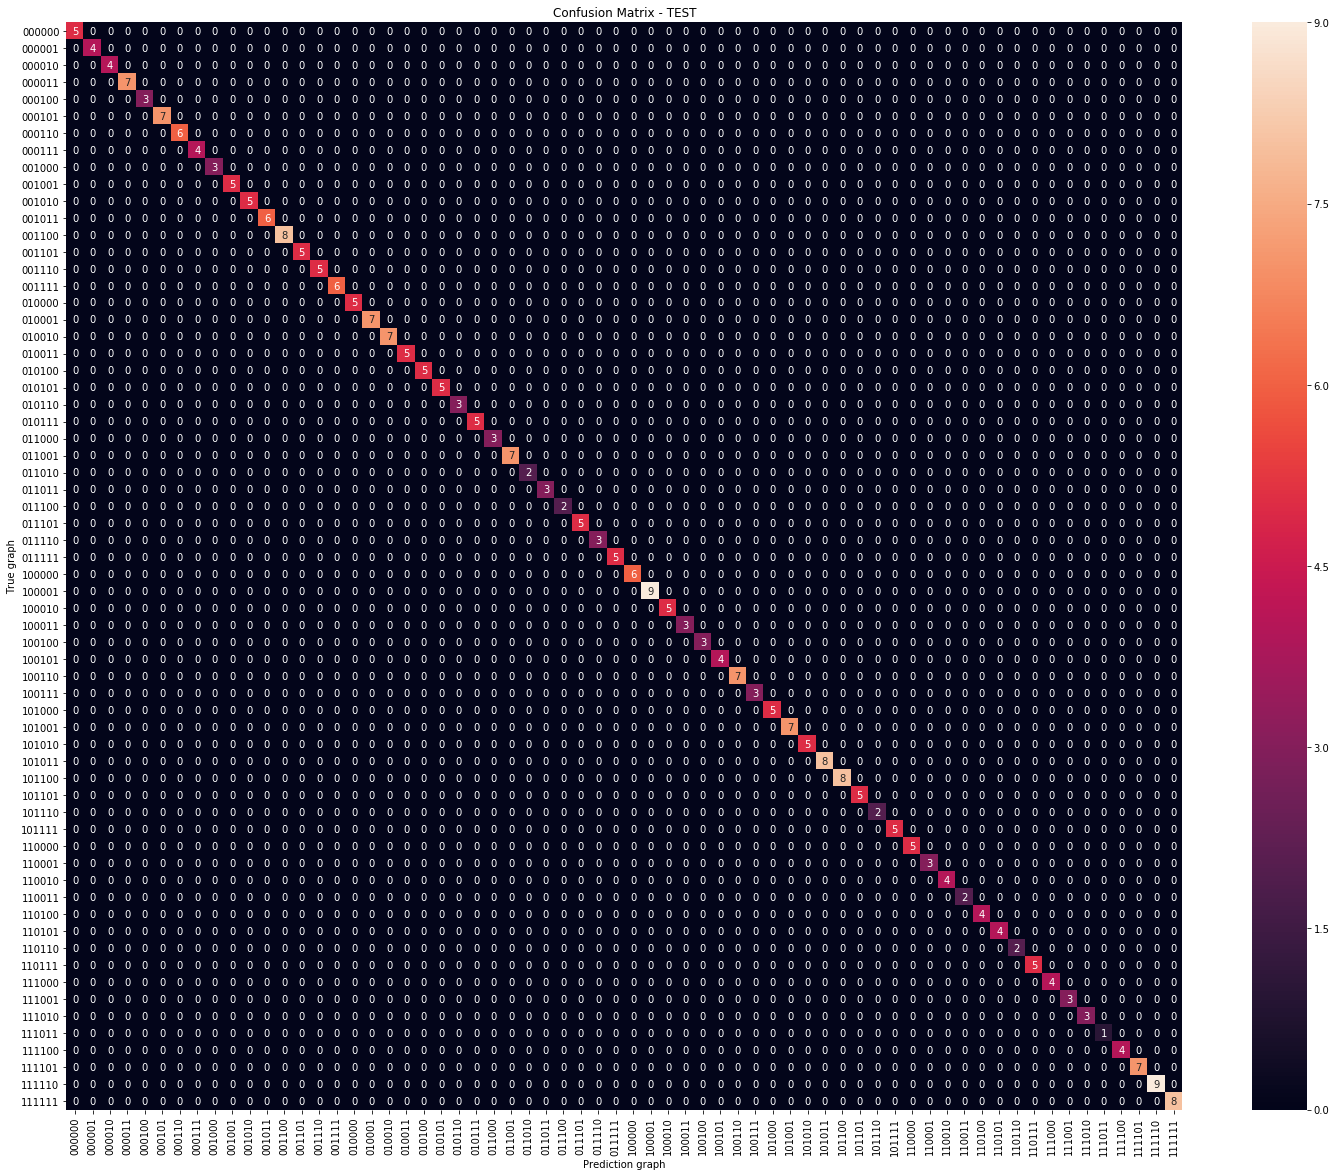

In [36]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset7/result_param10-6-i2-test7.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [37]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         5
      000001       1.00      1.00      1.00         4
      000010       1.00      1.00      1.00         4
      000011       1.00      1.00      1.00         7
      000100       1.00      1.00      1.00         3
      000101       1.00      1.00      1.00         7
      000110       1.00      1.00      1.00         6
      000111       1.00      1.00      1.00         4
      001000       1.00      1.00      1.00         3
      001001       1.00      1.00      1.00         5
      001010       1.00      1.00      1.00         5
      001011       1.00      1.00      1.00         6
      001100       1.00      1.00      1.00         8
      001101       1.00      1.00      1.00         5
      001110       1.00      1.00      1.00         5
      001111       1.00      1.00      1.00         6
      010000       1.00      

## dataset 8 - GRAPH:10 -> SUBGRAPH:6

,Name,Value
0,epocas,7752.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


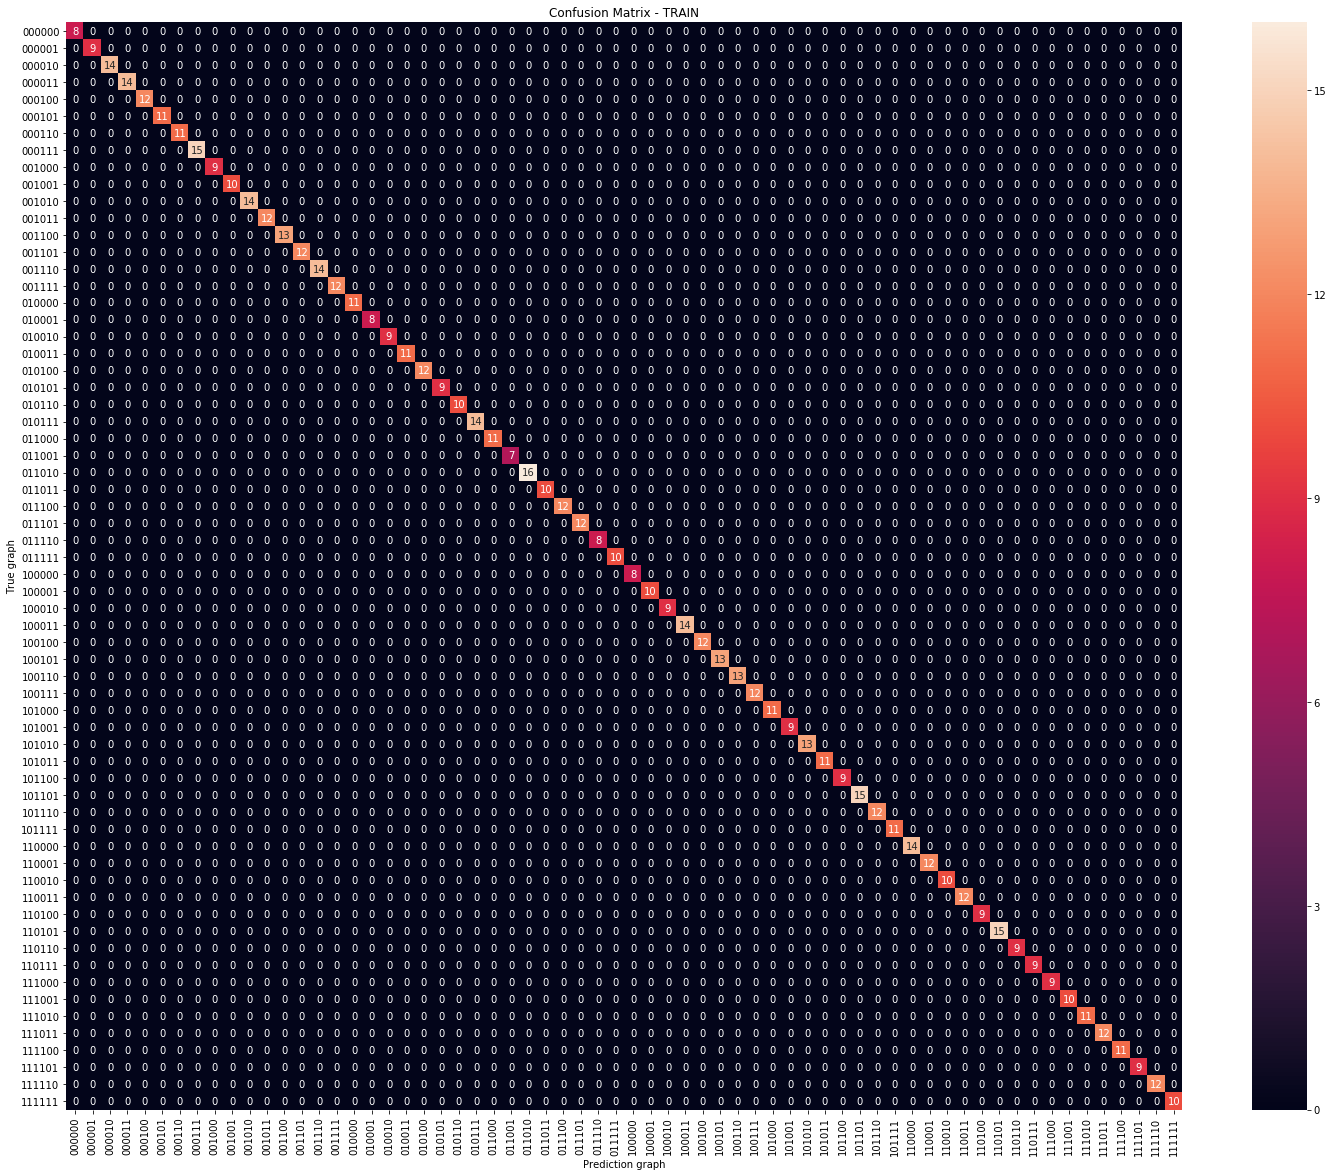

In [38]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset8/result_param10-6-i2-train8.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [39]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         8
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        14
      000011       1.00      1.00      1.00        14
      000100       1.00      1.00      1.00        12
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        11
      000111       1.00      1.00      1.00        15
      001000       1.00      1.00      1.00         9
      001001       1.00      1.00      1.00        10
      001010       1.00      1.00      1.00        14
      001011       1.00      1.00      1.00        12
      001100       1.00      1.00      1.00        13
      001101       1.00      1.00      1.00        12
      001110       1.00      1.00      1.00        14
      001111       1.00      1.00      1.00        12
      010000       1.00     

,Name,Value
0,epocas,7752.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


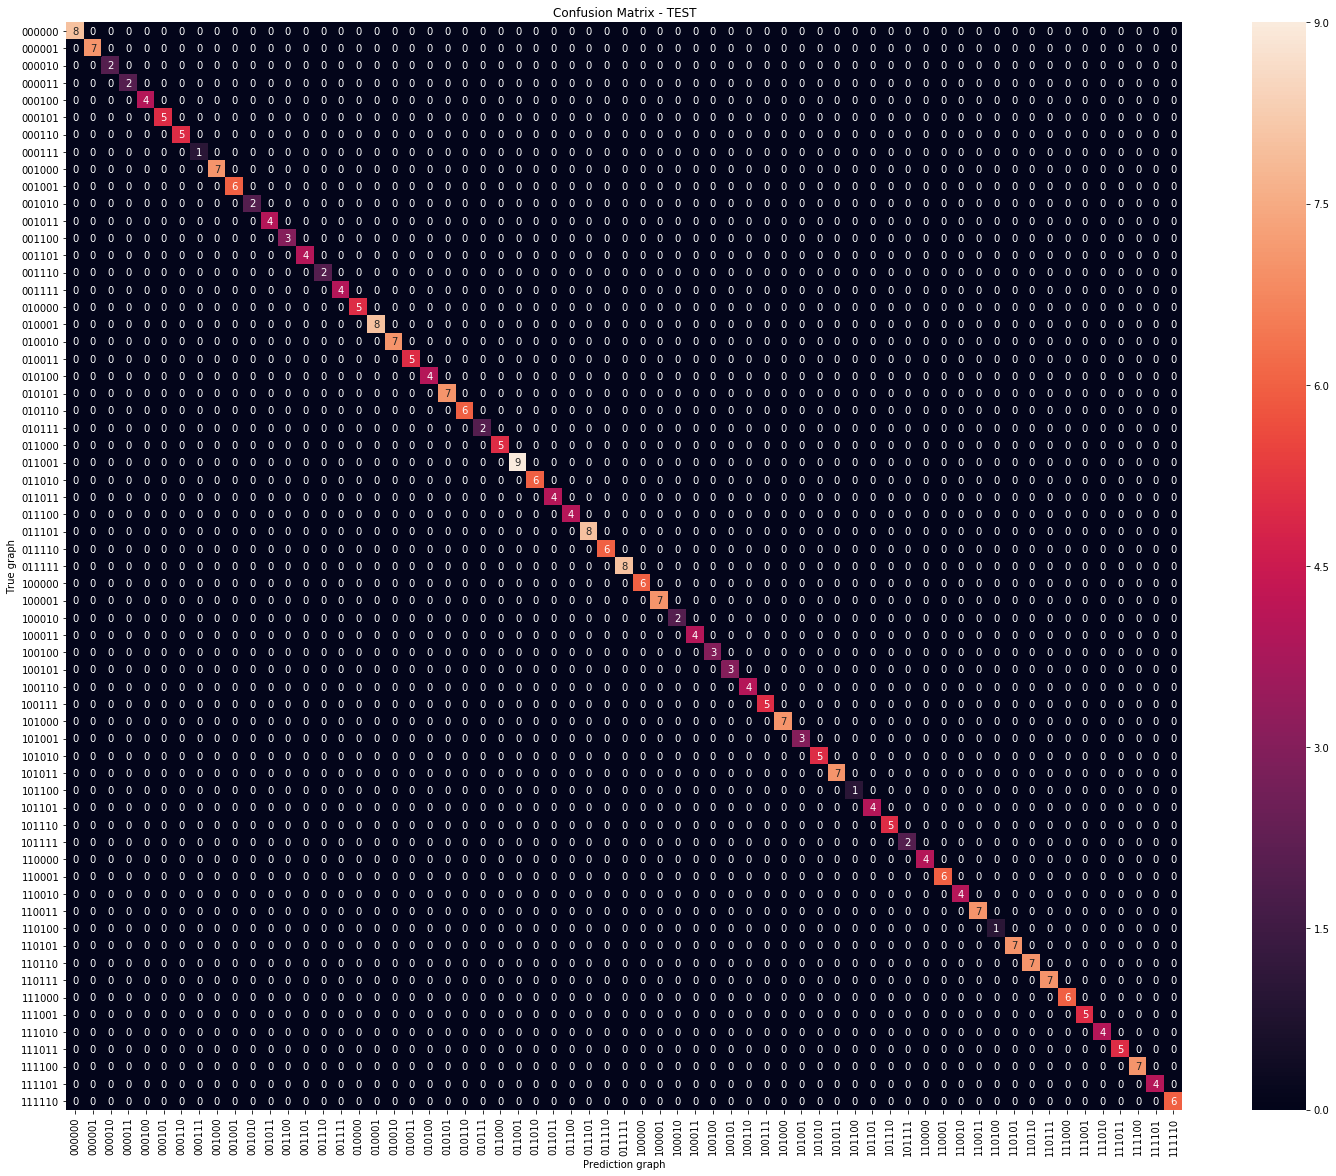

In [40]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset8/result_param10-6-i2-test8.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [41]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         8
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         2
      000011       1.00      1.00      1.00         2
      000100       1.00      1.00      1.00         4
      000101       1.00      1.00      1.00         5
      000110       1.00      1.00      1.00         5
      000111       1.00      1.00      1.00         1
      001000       1.00      1.00      1.00         7
      001001       1.00      1.00      1.00         6
      001010       1.00      1.00      1.00         2
      001011       1.00      1.00      1.00         4
      001100       1.00      1.00      1.00         3
      001101       1.00      1.00      1.00         4
      001110       1.00      1.00      1.00         2
      001111       1.00      1.00      1.00         4
      010000       1.00      

## dataset 9 - GRAPH:10 -> SUBGRAPH:6

,Name,Value
0,epocas,14187.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


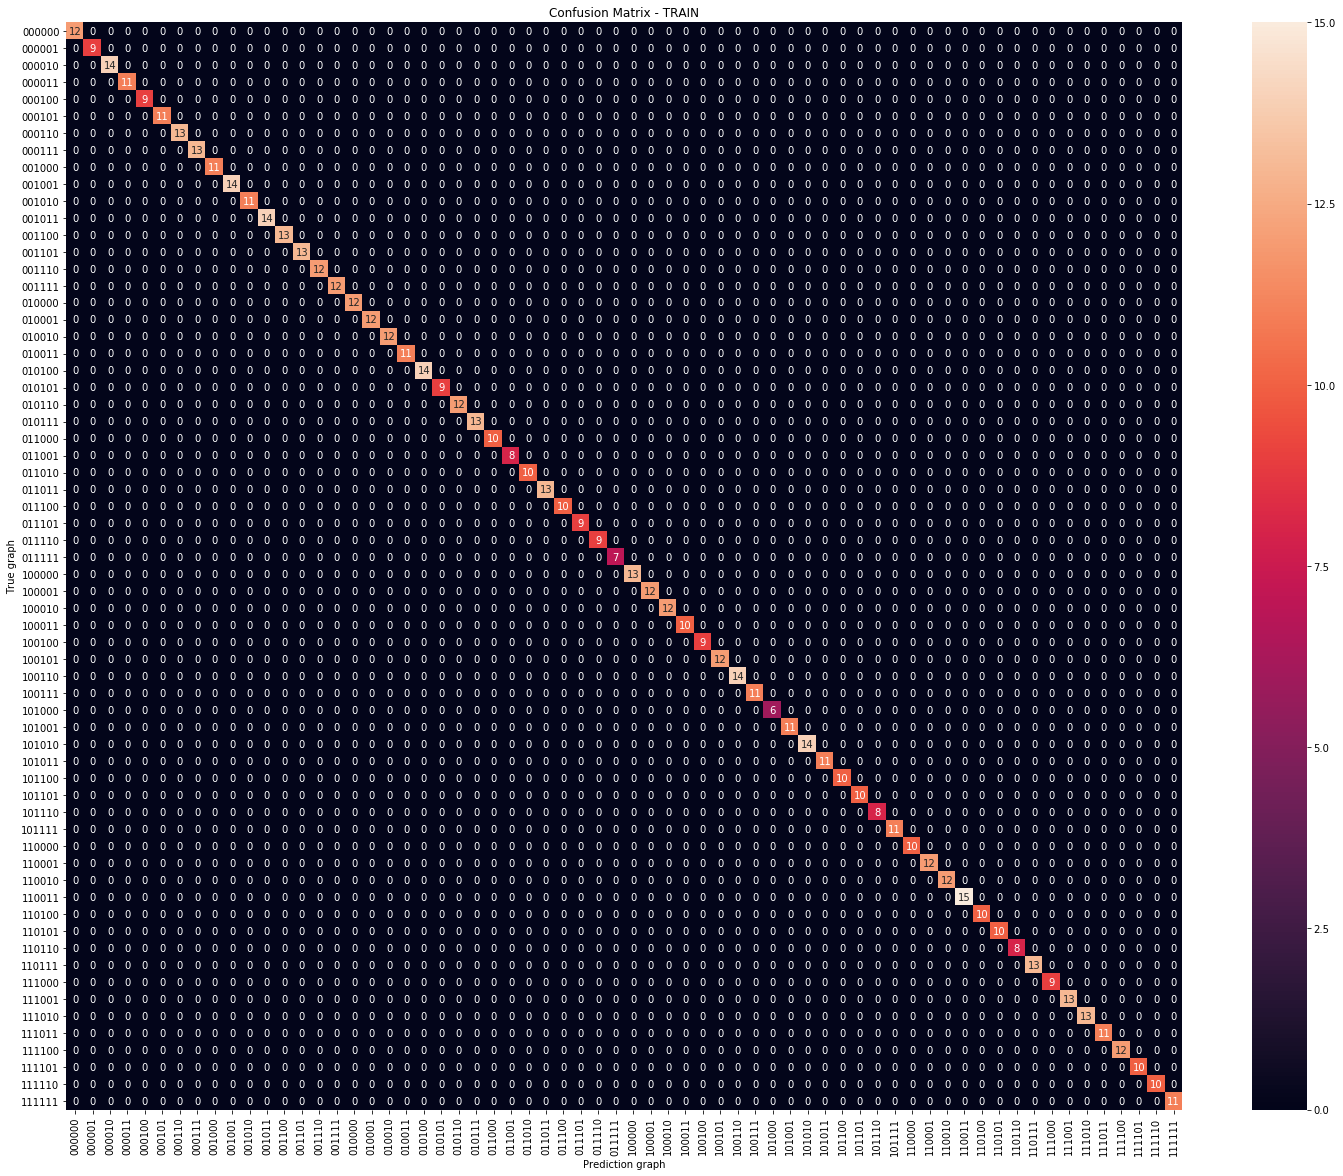

In [42]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset9/result_param10-6-i2-train9.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [43]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        12
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        14
      000011       1.00      1.00      1.00        11
      000100       1.00      1.00      1.00         9
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        13
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        11
      001001       1.00      1.00      1.00        14
      001010       1.00      1.00      1.00        11
      001011       1.00      1.00      1.00        14
      001100       1.00      1.00      1.00        13
      001101       1.00      1.00      1.00        13
      001110       1.00      1.00      1.00        12
      001111       1.00      1.00      1.00        12
      010000       1.00     

,Name,Value
0,epocas,14187.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


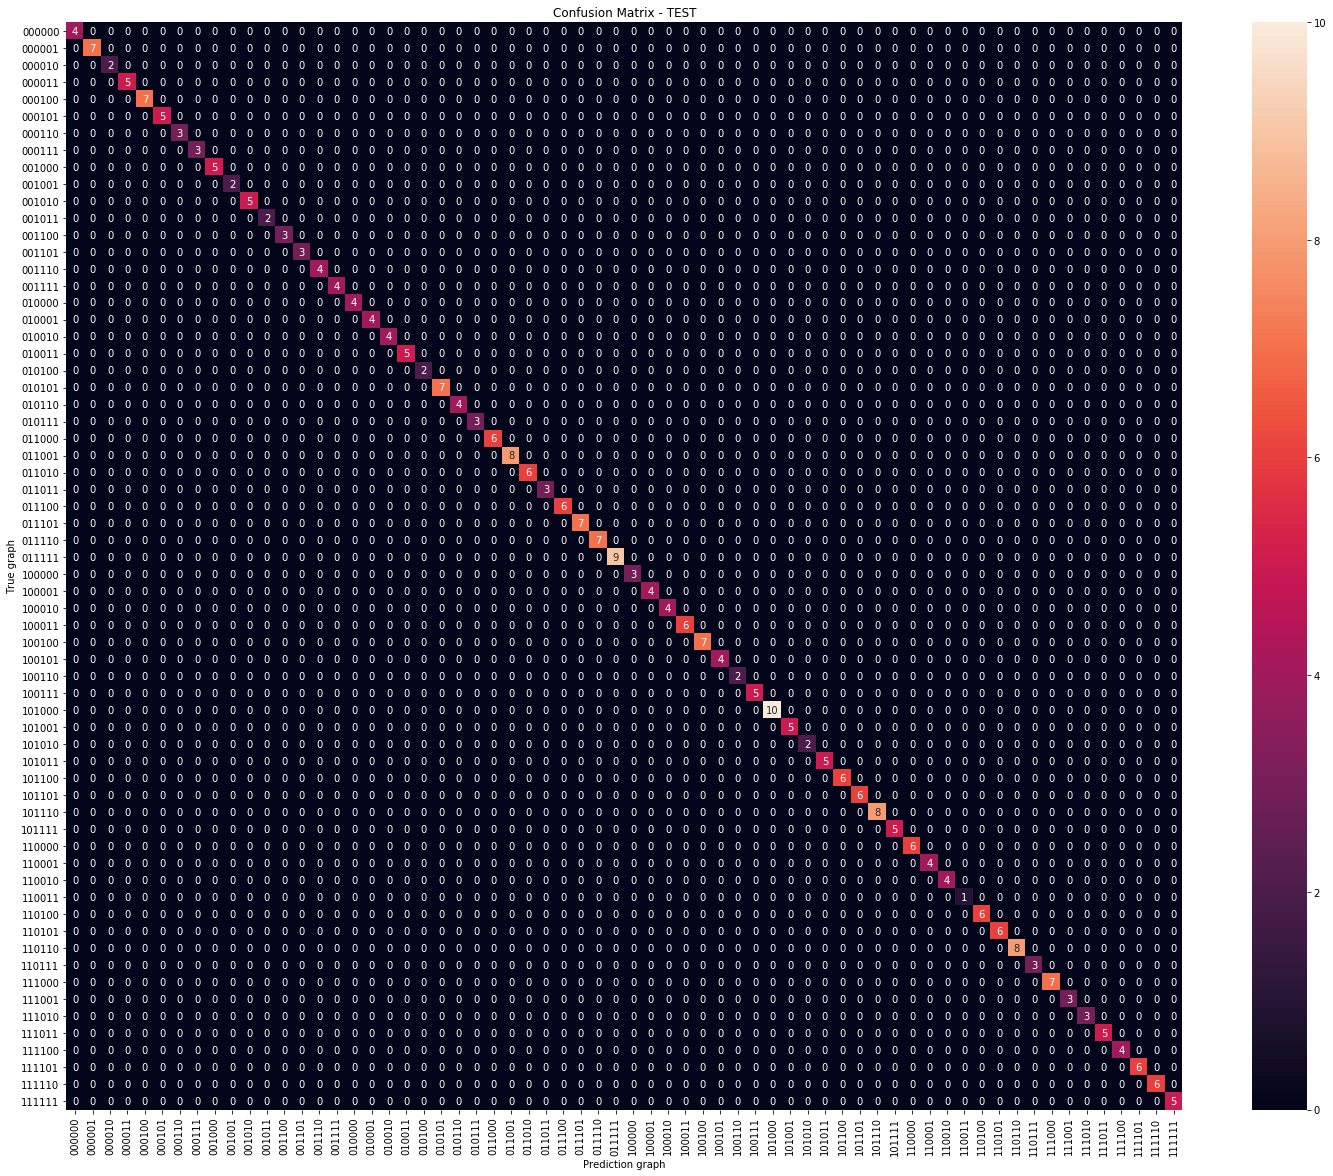

In [44]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_6/dataset9/result_param10-6-i2-test9.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**6)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');




In [45]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))



******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         4
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         2
      000011       1.00      1.00      1.00         5
      000100       1.00      1.00      1.00         7
      000101       1.00      1.00      1.00         5
      000110       1.00      1.00      1.00         3
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         5
      001001       1.00      1.00      1.00         2
      001010       1.00      1.00      1.00         5
      001011       1.00      1.00      1.00         2
      001100       1.00      1.00      1.00         3
      001101       1.00      1.00      1.00         3
      001110       1.00      1.00      1.00         4
      001111       1.00      1.00      1.00         4
      010000       1.00      

# Data grafos 10 - 3 

In [46]:

df_0 = pd.read_table('../../DATASET-10_3/dataset0/result-10-3-i2.txt',header=None)
df_1 = pd.read_table('../../DATASET-10_3/dataset1/result-10-3-i2.txt',header=None)
df_2 = pd.read_table('../../DATASET-10_3/dataset2/result-10-3-i2.txt',header=None)
df_3 = pd.read_table('../../DATASET-10_3/dataset3/result-10-3-i2.txt',header=None)
df_4 = pd.read_table('../../DATASET-10_3/dataset4/result-10-3-i2.txt',header=None)
df_5 = pd.read_table('../../DATASET-10_3/dataset5/result-10-3-i2.txt',header=None)
df_6 = pd.read_table('../../DATASET-10_3/dataset6/result-10-3-i2.txt',header=None)
df_7 = pd.read_table('../../DATASET-10_3/dataset7/result-10-3-i2.txt',header=None)
df_8 = pd.read_table('../../DATASET-10_3/dataset8/result-10-3-i2.txt',header=None)
df_9 = pd.read_table('../../DATASET-10_3/dataset9/result-10-3-i2.txt',header=None)



C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: 

In [47]:
if np.isnan(df_0[-1:][1].values[0]):
    df_0=df_0[:-5]
if np.isnan(df_1[-1:][1].values[0]):
    df_1=df_1[:-5]
if np.isnan(df_2[-1:][1].values[0]):
    df_2=df_2[:-5]
if np.isnan(df_3[-1:][1].values[0]):
    df_3=df_3[:-5]
if np.isnan(df_4[-1:][1].values[0]):
    df_4=df_4[:-5]
if np.isnan(df_5[-1:][1].values[0]):
    df_5=df_5[:-5]
if np.isnan(df_6[-1:][1].values[0]):
    df_6=df_6[:-5]
if np.isnan(df_7[-1:][1].values[0]):
    df_7=df_7[:-5]
if np.isnan(df_8[-1:][1].values[0]):
    df_8=df_8[:-5]
if np.isnan(df_9[-1:][1].values[0]):
    df_9=df_9[:-5]

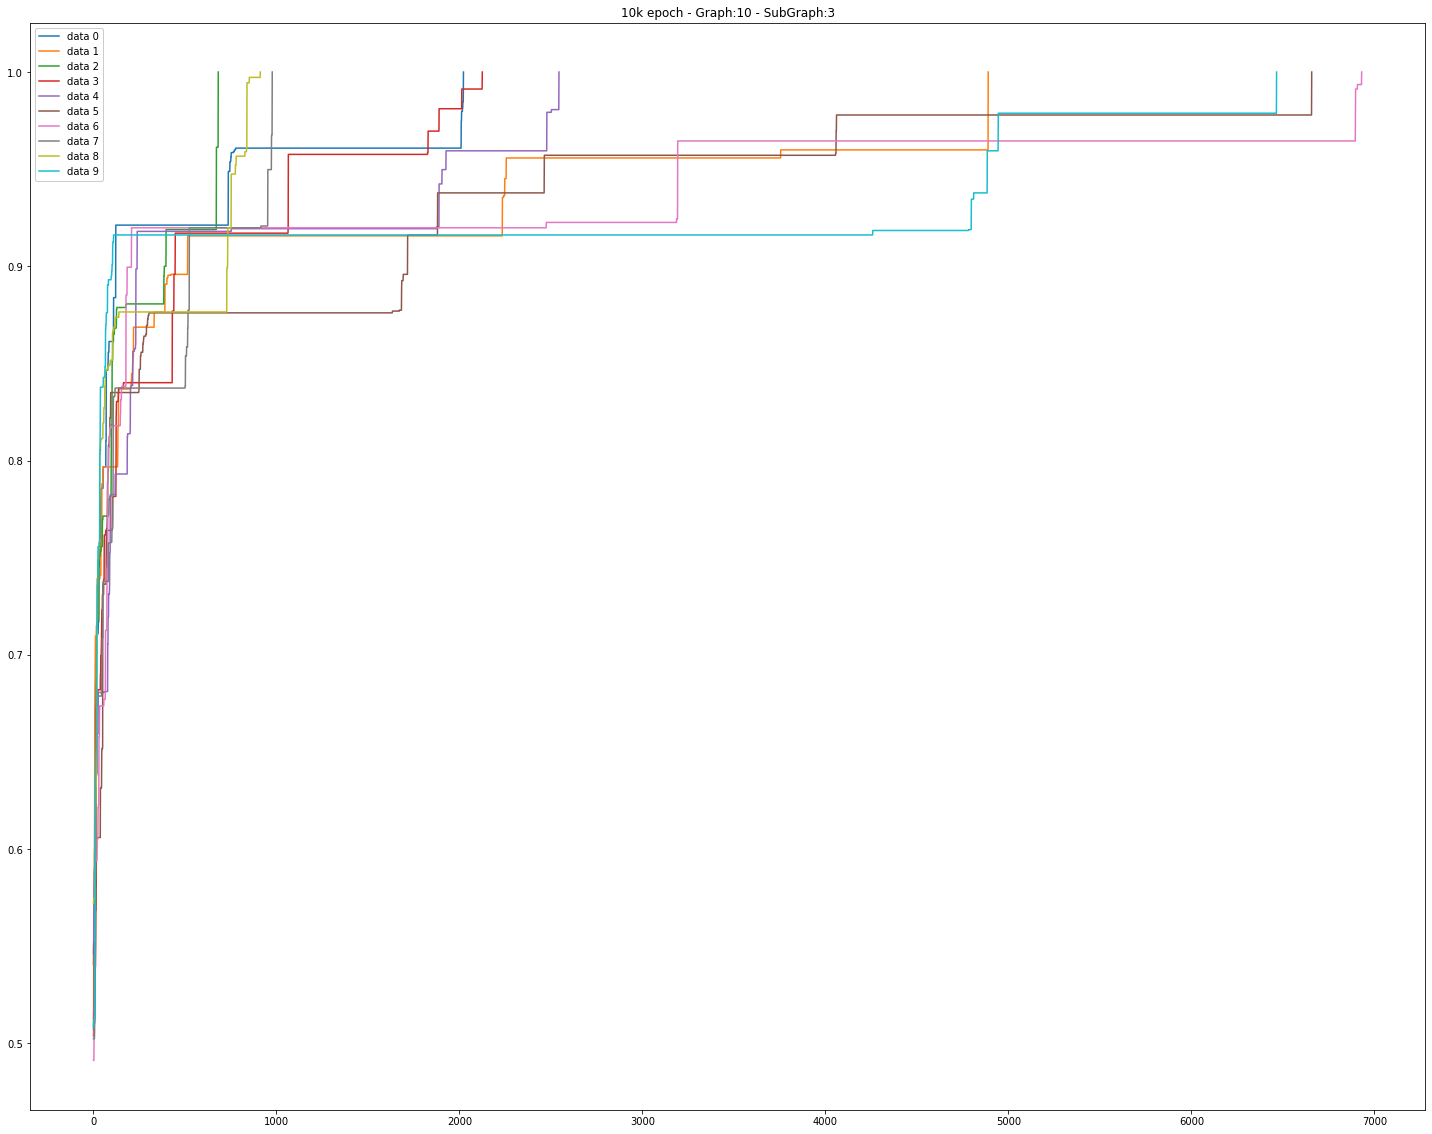

In [48]:
#plt.plot(y)
plt.plot(df_0[1],label='data 0')
plt.plot(df_1[1],label='data 1')
plt.plot(df_2[1],label='data 2')
plt.plot(df_3[1],label='data 3')
plt.plot(df_4[1],label='data 4')
plt.plot(df_5[1],label='data 5')
plt.plot(df_6[1],label='data 6')
plt.plot(df_7[1],label='data 7')
plt.plot(df_8[1],label='data 8')
plt.plot(df_9[1],label='data 9')

plt.title("10k epoch - Graph:10 - SubGraph:3")

plt.legend(framealpha=1, frameon=True);

In [49]:
def df_Y2Ypredict(ruta):
    f = open(ruta)
    lines = f.readlines()
    num_epocas = int(str(lines[2][:-1]).split(' ')[-1]) #
    performance_train = float(str(lines[3]).split(' ')[-1])#
    performance_evalu = float(str(lines[4]).split(' ')[-1])#
    df_y_yPredict = pd.DataFrame([str(lines[8:-5][i]).split('\t') for i in range(len(lines[8:-5]))])
    temp = df_y_yPredict[4]
    temp = [int(temp[i]) for i in range(len(temp))]
    df_y_yPredict[4] = temp#
    accuracy = float(str(lines[-4]).split(' ')[-1])#
    df_y_yPredict = df_y_yPredict[[1,2,3,4]]
    df_y_yPredict.columns = ['v_input','v_predict','v_output','error']
    return num_epocas,performance_train, performance_evalu, df_y_yPredict, accuracy
    

##  dataset 0 - GRAPH:10 -> SUBGRAPH:3

,Name,Value
0,epocas,2023.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


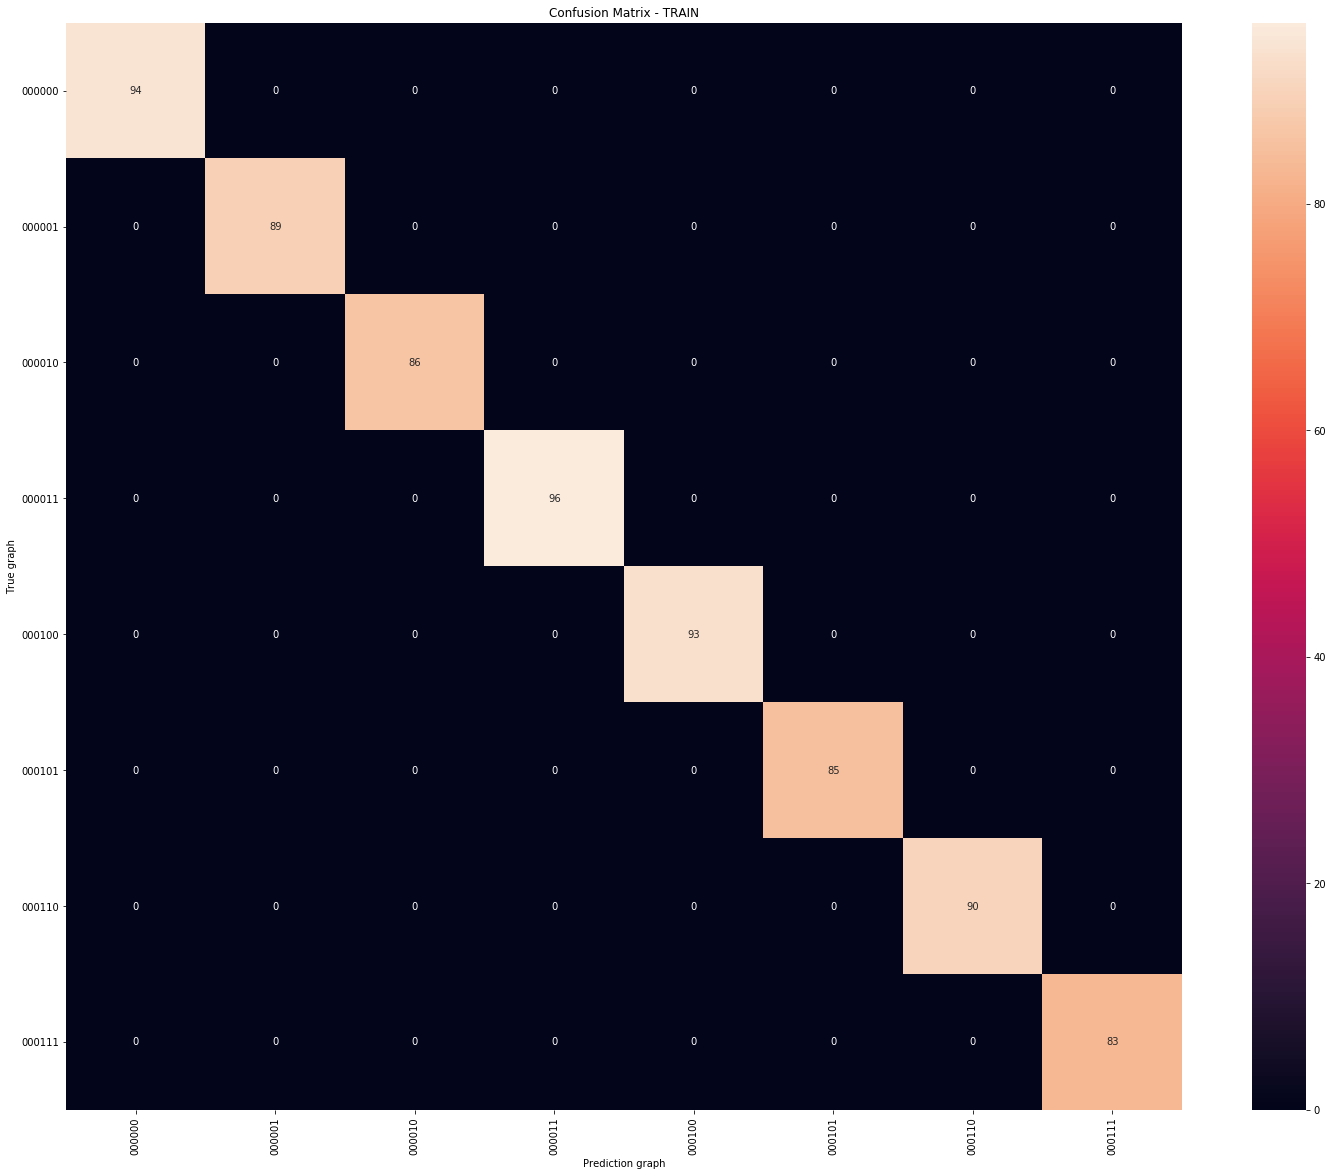

In [50]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset0/result_param10-3-i2-train0.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [ ]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

,Name,Value
0,epocas,2023.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


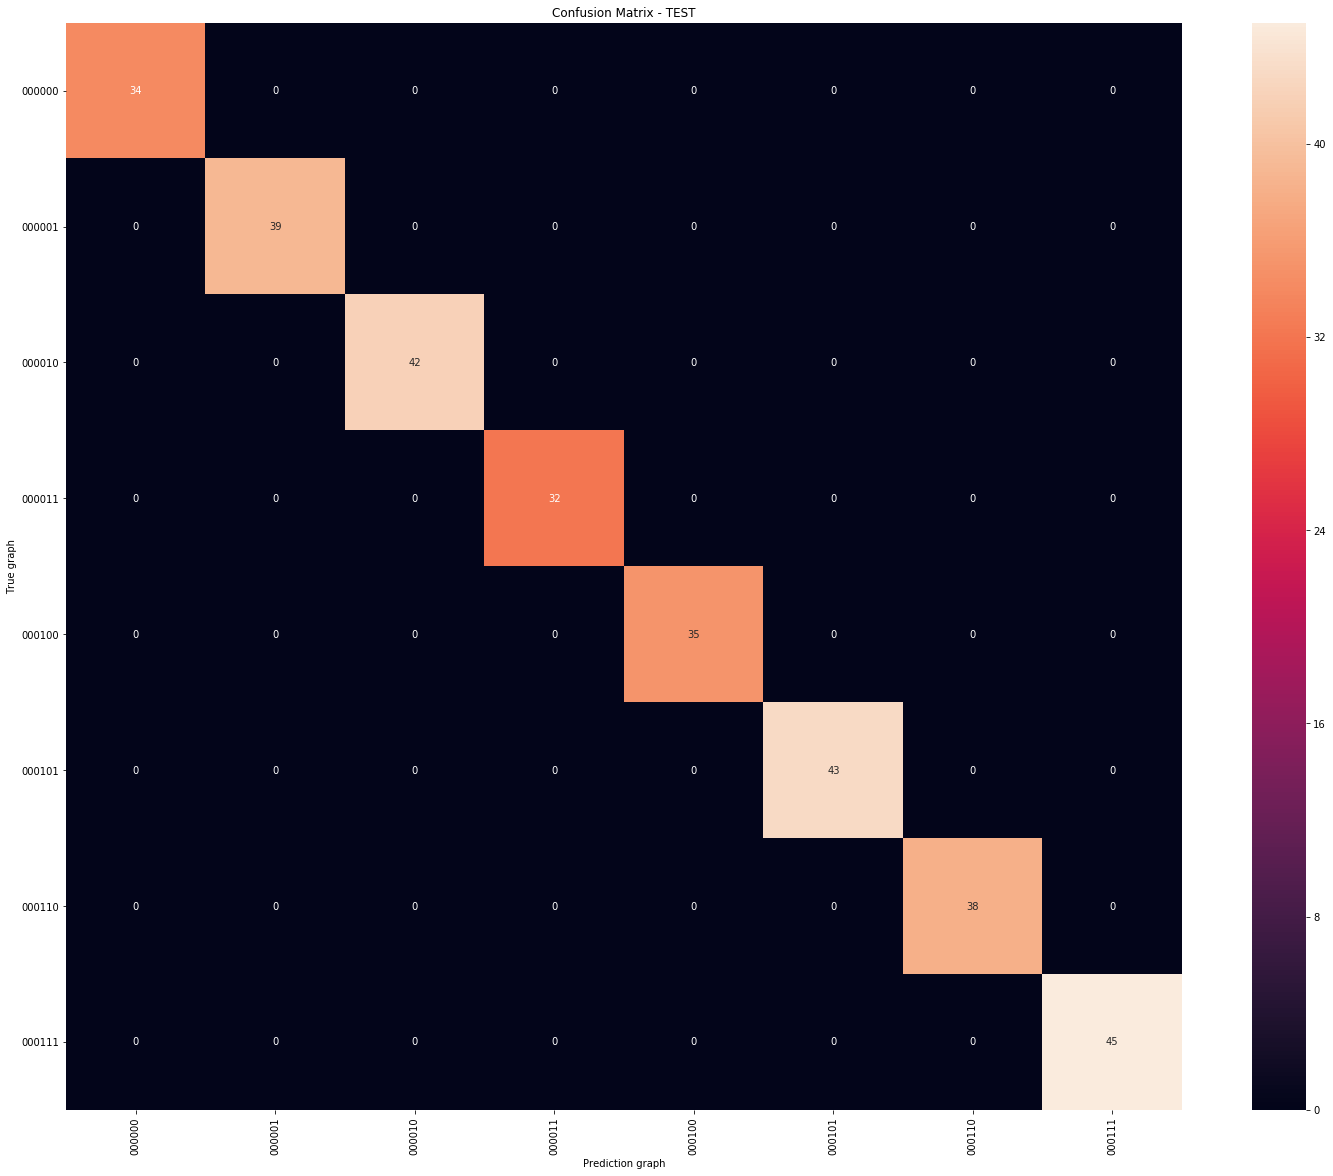

In [51]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset0/result_param10-3-i2-test0.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [52]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

         000       1.00      1.00      1.00        34
         001       1.00      1.00      1.00        39
         010       1.00      1.00      1.00        42
         011       1.00      1.00      1.00        32
         100       1.00      1.00      1.00        35
         101       1.00      1.00      1.00        43
         110       1.00      1.00      1.00        38
         111       1.00      1.00      1.00        45

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



##  dataset 1 - GRAPH:10 -> SUBGRAPH:3

In [ ]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset1/result_param10-3-i2-train1.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [ ]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

,Name,Value
0,epocas,4891.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


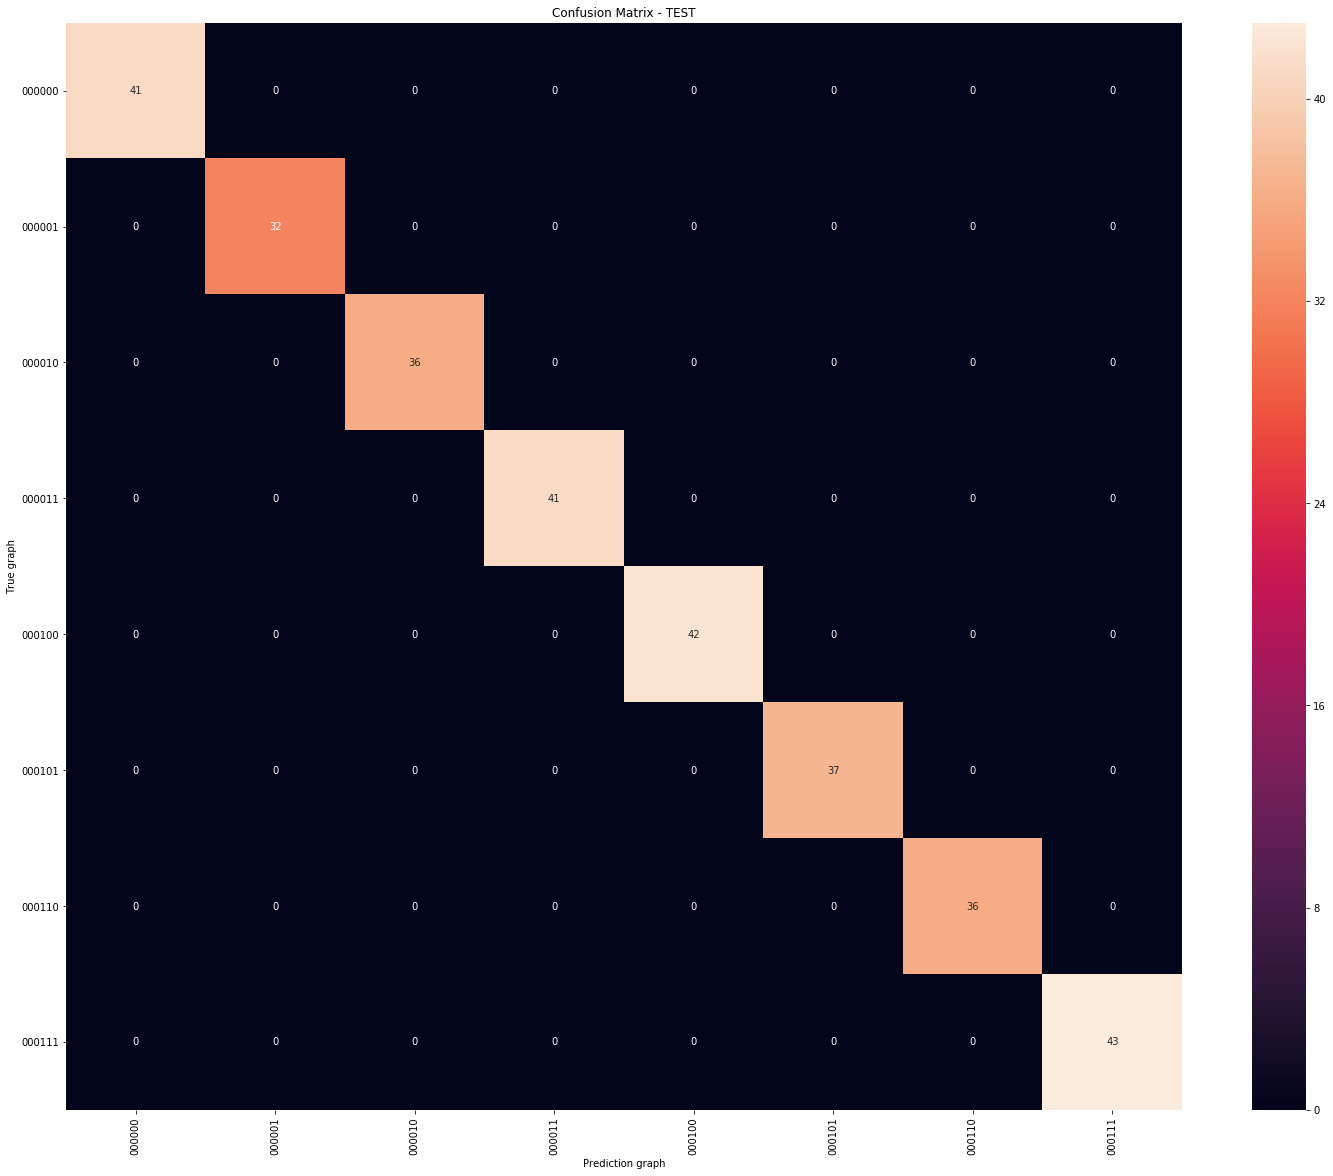

In [53]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset1/result_param10-3-i2-test1.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [ ]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

##  dataset 2 - GRAPH:10 -> SUBGRAPH:3

In [ ]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset2/result_param10-3-i2-train2.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [ ]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

,Name,Value
0,epocas,683.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


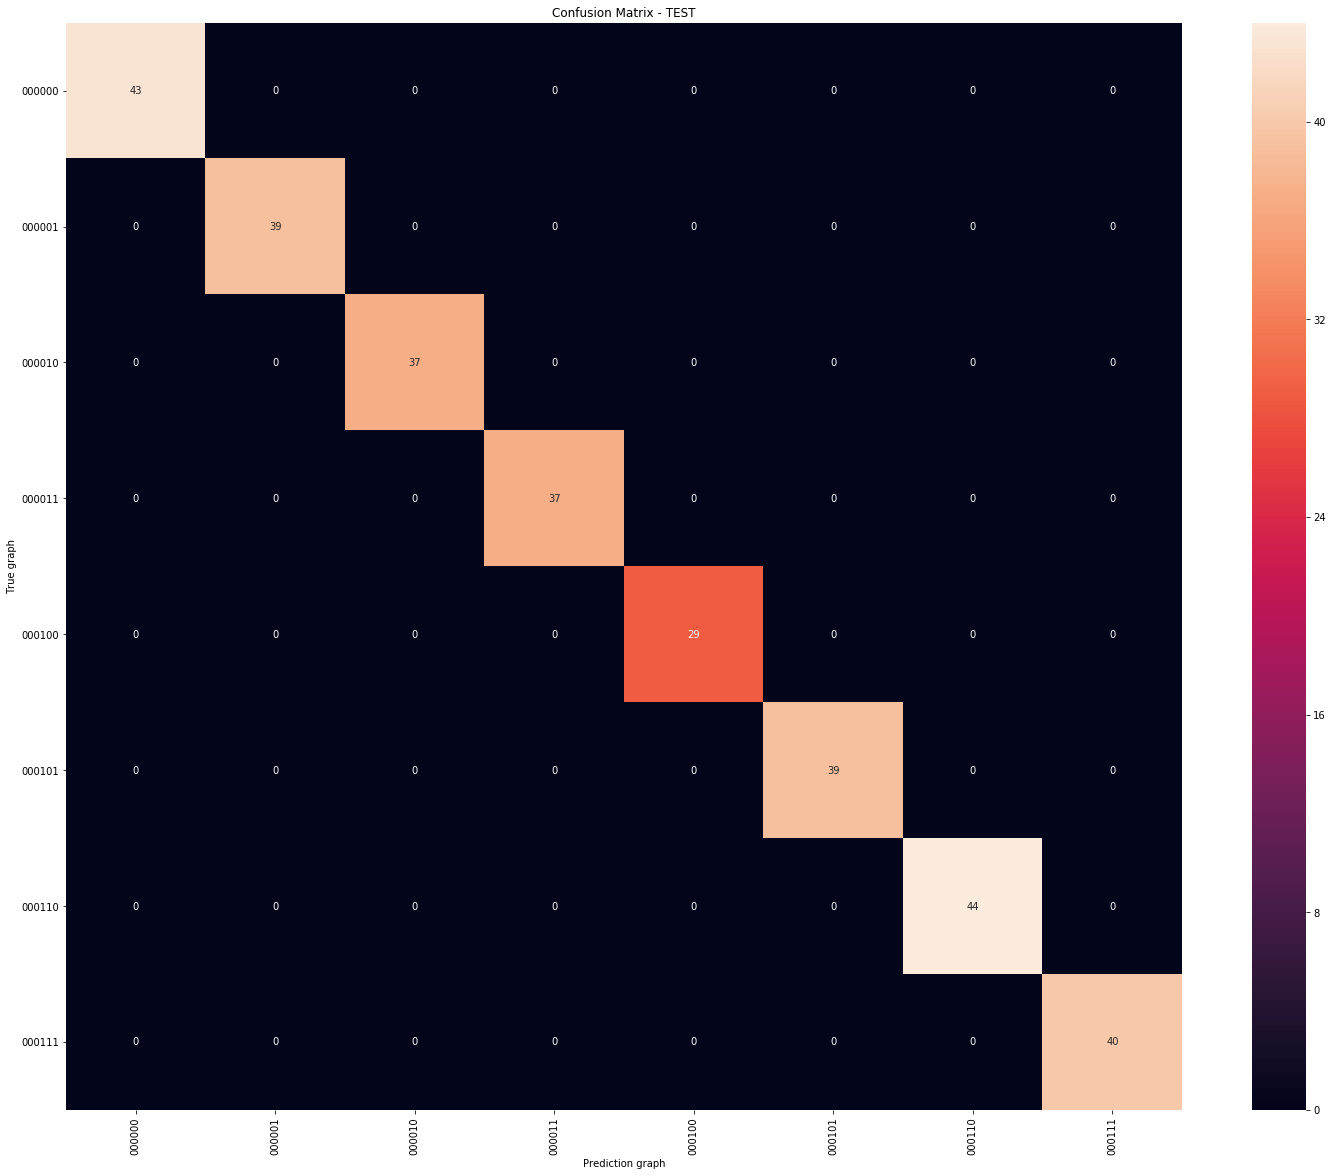

In [55]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset2/result_param10-3-i2-test2.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [56]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

         000       1.00      1.00      1.00        43
         001       1.00      1.00      1.00        39
         010       1.00      1.00      1.00        37
         011       1.00      1.00      1.00        37
         100       1.00      1.00      1.00        29
         101       1.00      1.00      1.00        39
         110       1.00      1.00      1.00        44
         111       1.00      1.00      1.00        40

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



##  dataset 3 - GRAPH:10 -> SUBGRAPH:3

In [ ]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset3/result_param10-3-i2-train3.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [ ]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

,Name,Value
0,epocas,2126.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


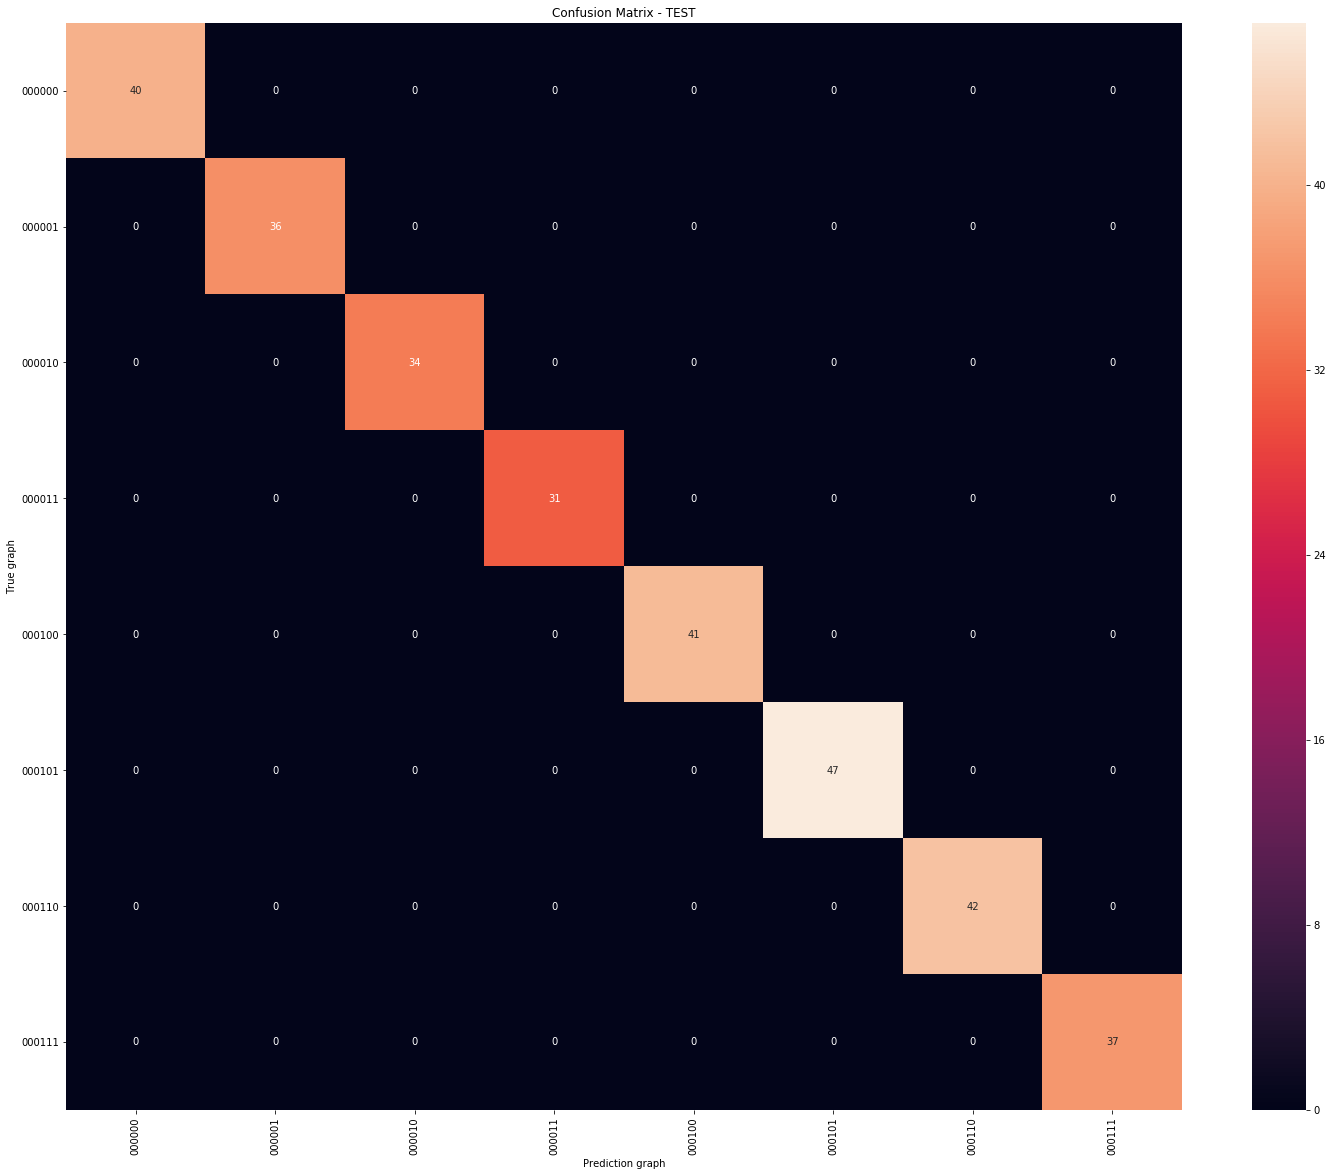

In [57]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset3/result_param10-3-i2-test3.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [58]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

         000       1.00      1.00      1.00        40
         001       1.00      1.00      1.00        36
         010       1.00      1.00      1.00        34
         011       1.00      1.00      1.00        31
         100       1.00      1.00      1.00        41
         101       1.00      1.00      1.00        47
         110       1.00      1.00      1.00        42
         111       1.00      1.00      1.00        37

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



##  dataset 4 - GRAPH:10 -> SUBGRAPH:3

In [ ]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset4/result_param10-3-i2-train2.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



,Name,Value
0,epocas,2545.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


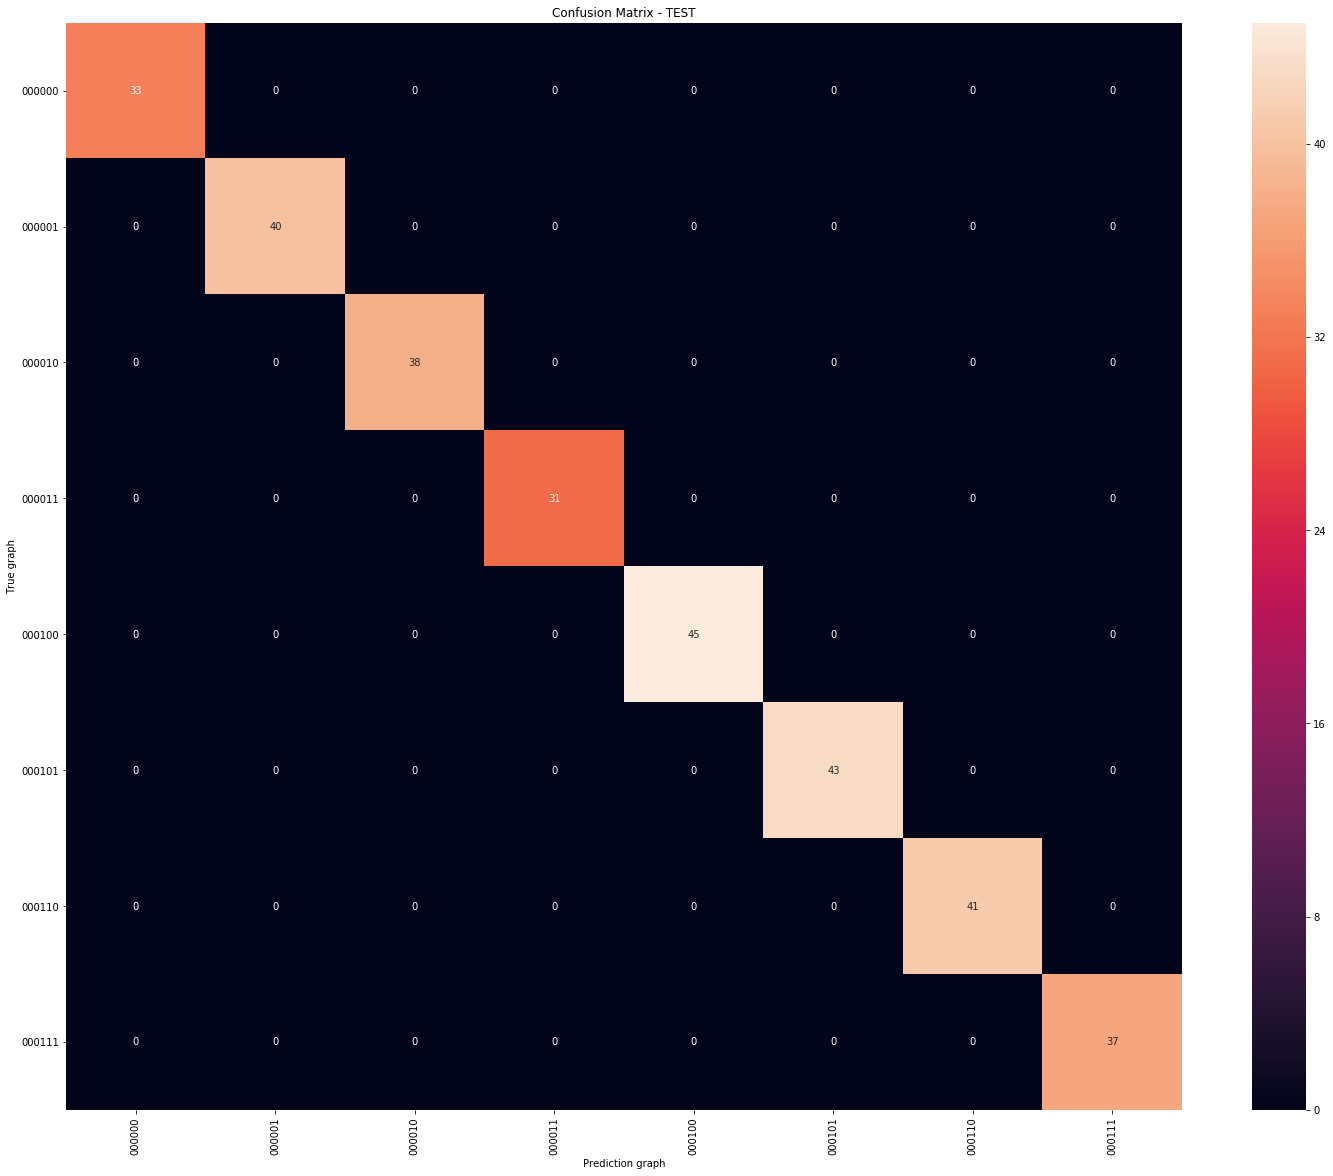

In [59]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset4/result_param10-3-i2-test4.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [60]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

         000       1.00      1.00      1.00        33
         001       1.00      1.00      1.00        40
         010       1.00      1.00      1.00        38
         011       1.00      1.00      1.00        31
         100       1.00      1.00      1.00        45
         101       1.00      1.00      1.00        43
         110       1.00      1.00      1.00        41
         111       1.00      1.00      1.00        37

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



##  dataset 5 - GRAPH:10 -> SUBGRAPH:3

In [ ]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset5/result_param10-3-i2-train2.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



,Name,Value
0,epocas,6659.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


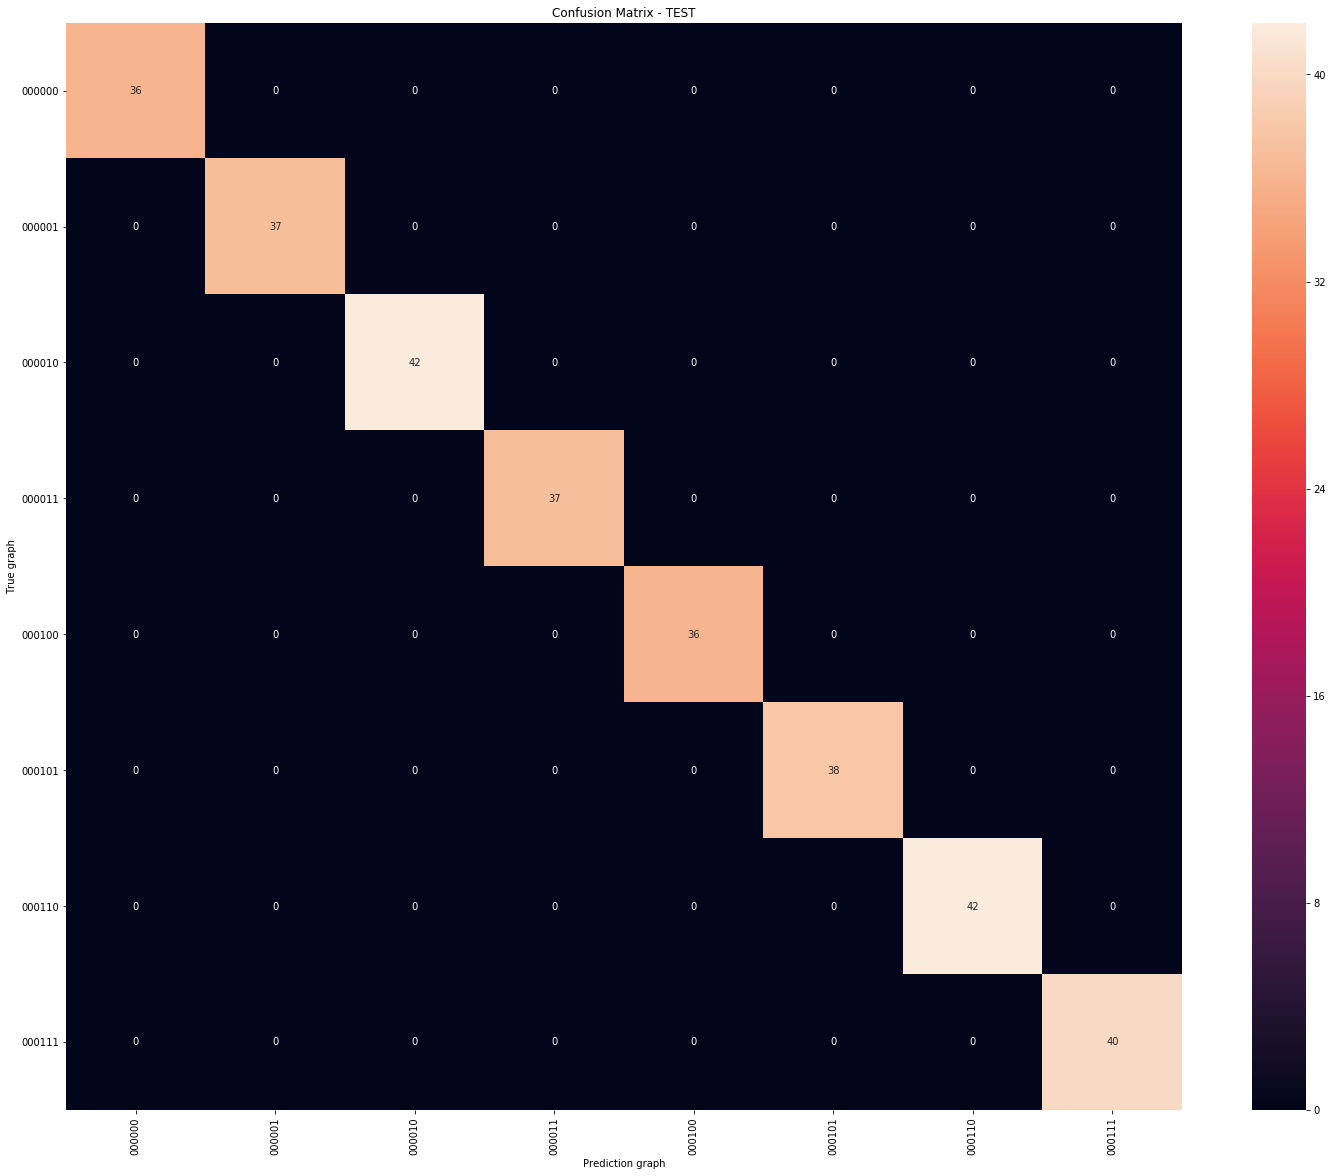

In [61]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset5/result_param10-3-i2-test5.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [62]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

         000       1.00      1.00      1.00        36
         001       1.00      1.00      1.00        37
         010       1.00      1.00      1.00        42
         011       1.00      1.00      1.00        37
         100       1.00      1.00      1.00        36
         101       1.00      1.00      1.00        38
         110       1.00      1.00      1.00        42
         111       1.00      1.00      1.00        40

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



##  dataset 6 - GRAPH:10 -> SUBGRAPH:3

In [ ]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset6/result_param10-3-i2-train2.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



,Name,Value
0,epocas,6932.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


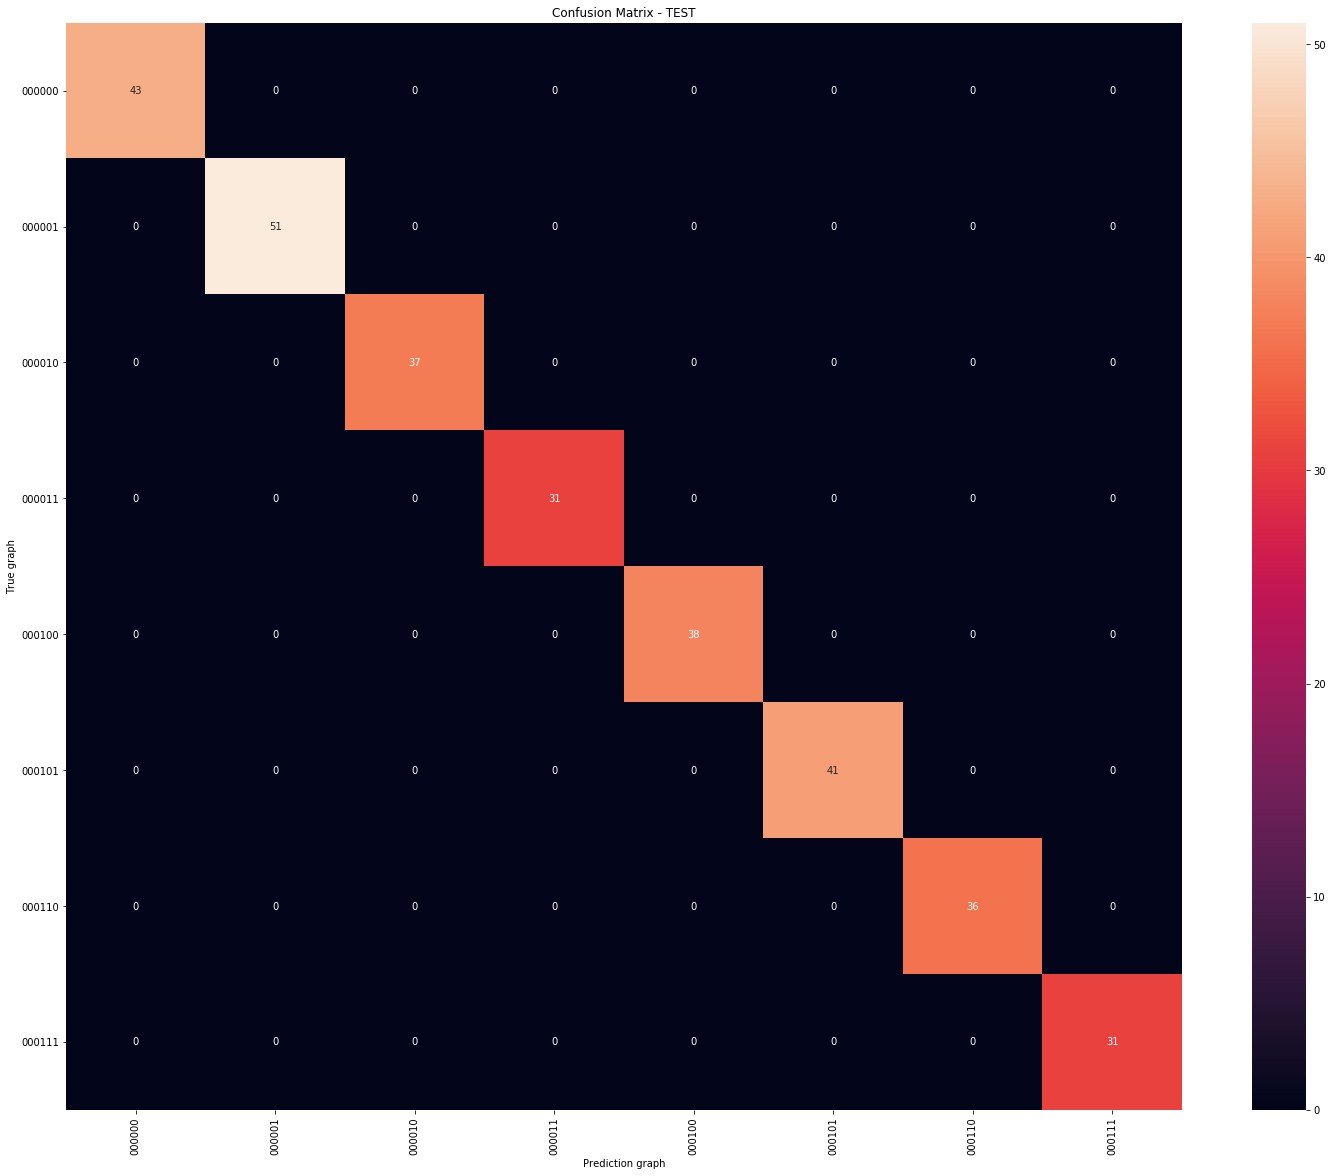

In [63]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset6/result_param10-3-i2-test6.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [64]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

         000       1.00      1.00      1.00        43
         001       1.00      1.00      1.00        51
         010       1.00      1.00      1.00        37
         011       1.00      1.00      1.00        31
         100       1.00      1.00      1.00        38
         101       1.00      1.00      1.00        41
         110       1.00      1.00      1.00        36
         111       1.00      1.00      1.00        31

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



##  dataset 7 - GRAPH:10 -> SUBGRAPH:3

In [ ]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset7/result_param10-3-i2-train7.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



,Name,Value
0,epocas,978.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


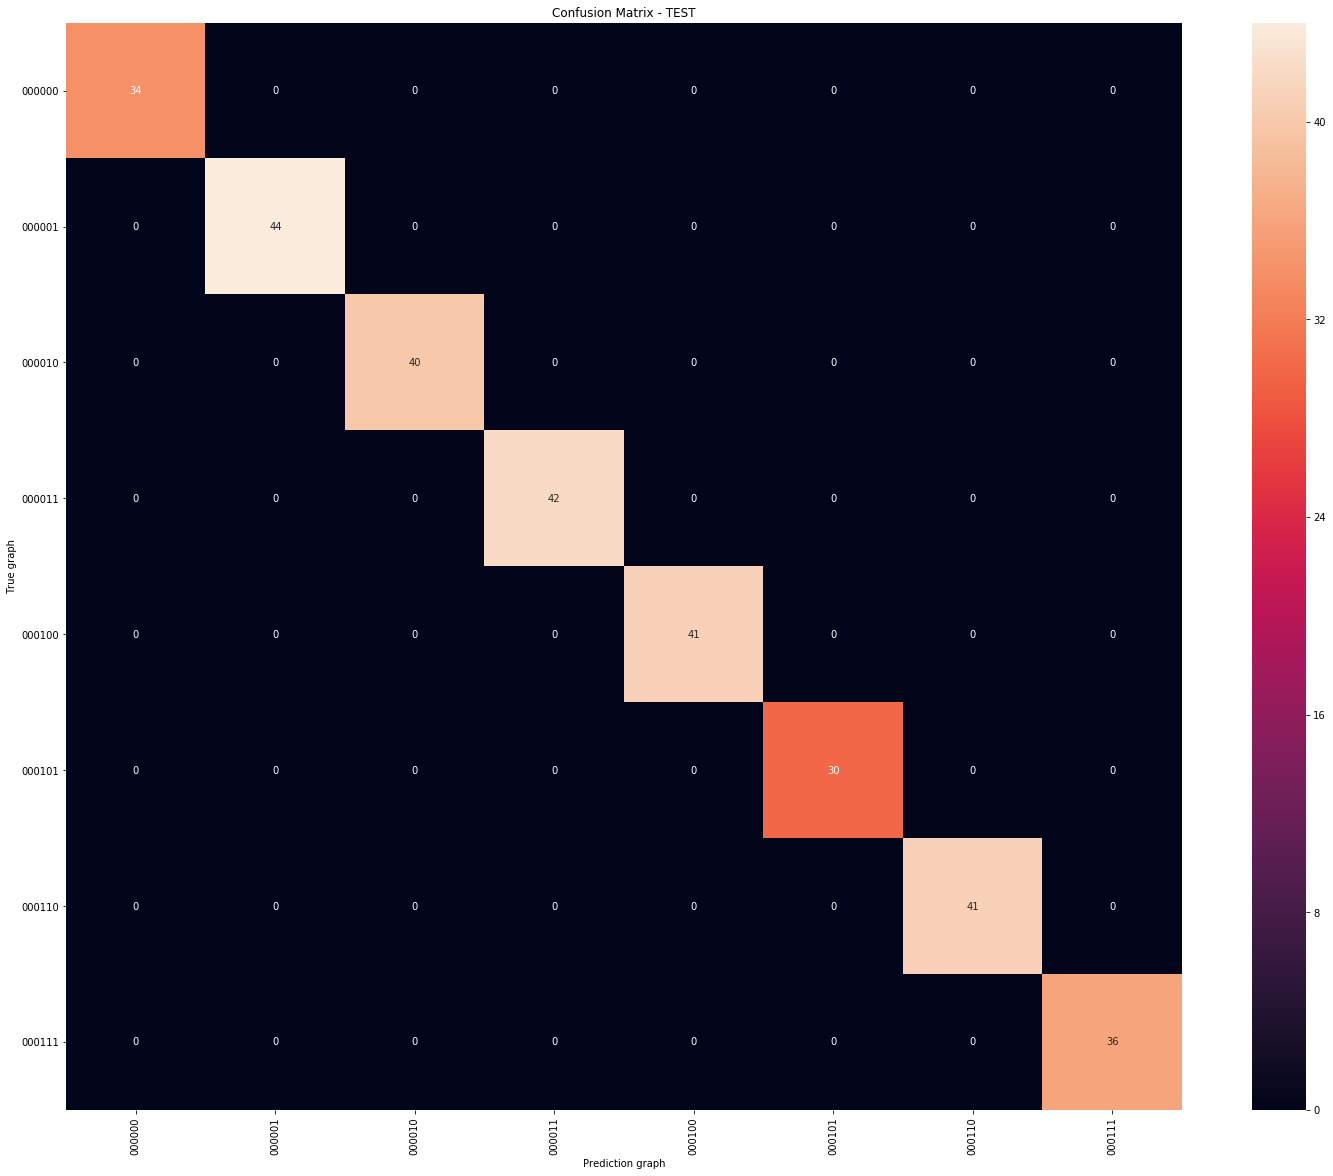

In [65]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset7/result_param10-3-i2-test7.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [66]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

         000       1.00      1.00      1.00        34
         001       1.00      1.00      1.00        44
         010       1.00      1.00      1.00        40
         011       1.00      1.00      1.00        42
         100       1.00      1.00      1.00        41
         101       1.00      1.00      1.00        30
         110       1.00      1.00      1.00        41
         111       1.00      1.00      1.00        36

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



##  dataset 8 - GRAPH:10 -> SUBGRAPH:3

,Name,Value
0,epocas,913.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


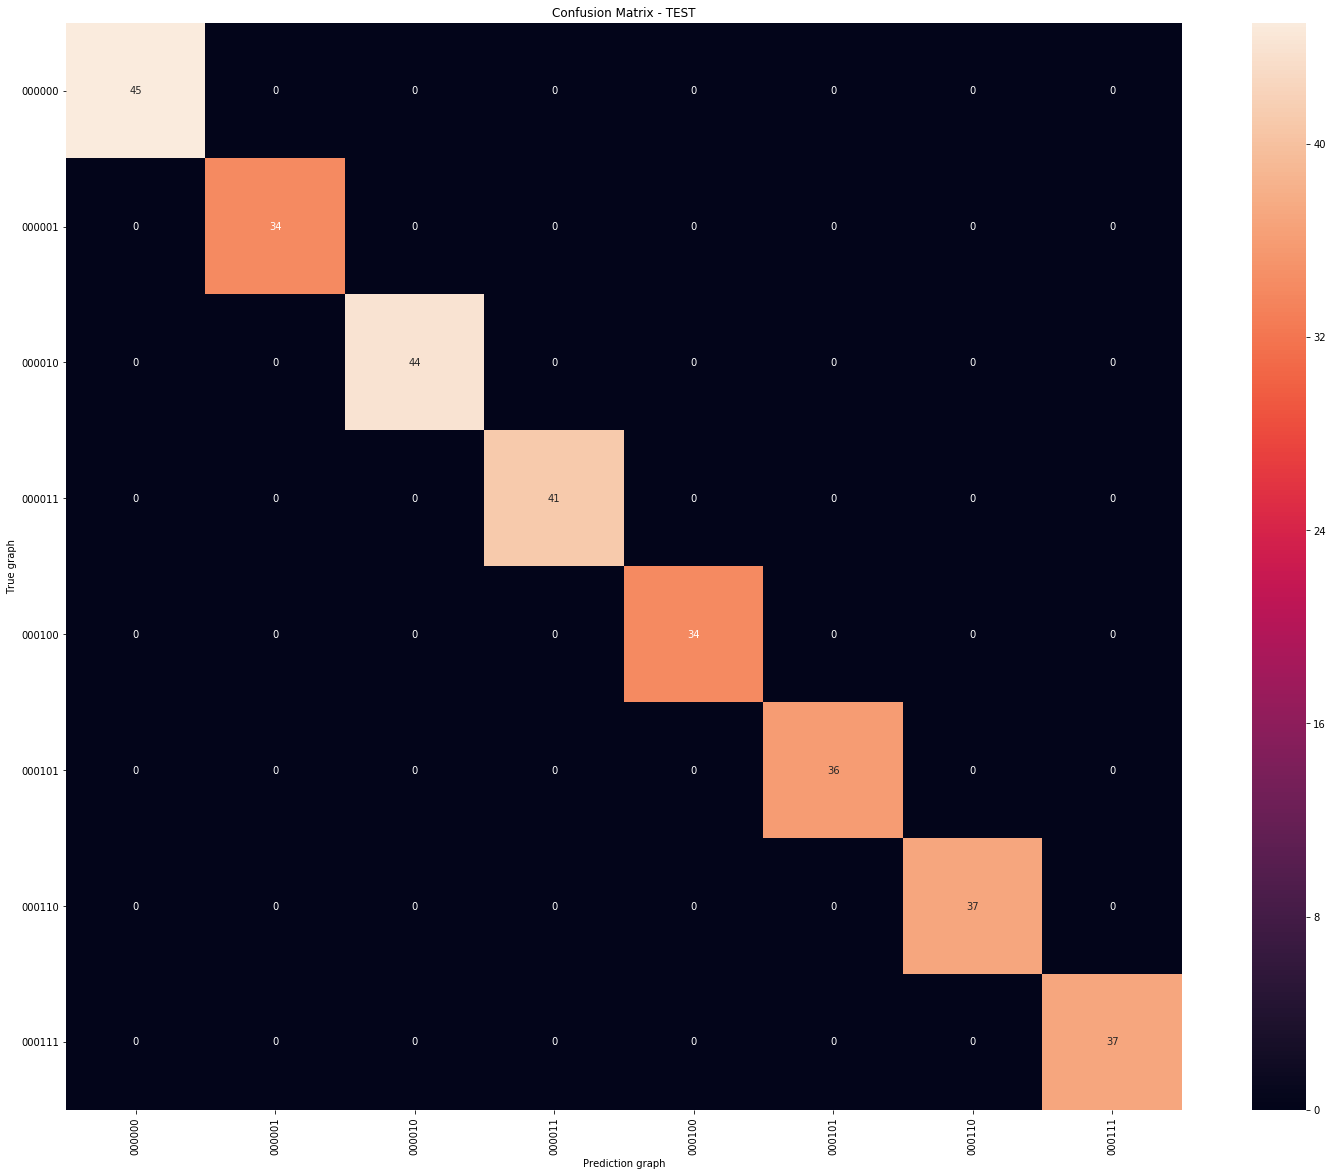

In [67]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset8/result_param10-3-i2-test8.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [68]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

         000       1.00      1.00      1.00        45
         001       1.00      1.00      1.00        34
         010       1.00      1.00      1.00        44
         011       1.00      1.00      1.00        41
         100       1.00      1.00      1.00        34
         101       1.00      1.00      1.00        36
         110       1.00      1.00      1.00        37
         111       1.00      1.00      1.00        37

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



##  dataset 9 - GRAPH:10 -> SUBGRAPH:3

,Name,Value
0,epocas,6467.0
1,pTrain,1.0
2,pHamm,1.0
3,ac,1.0


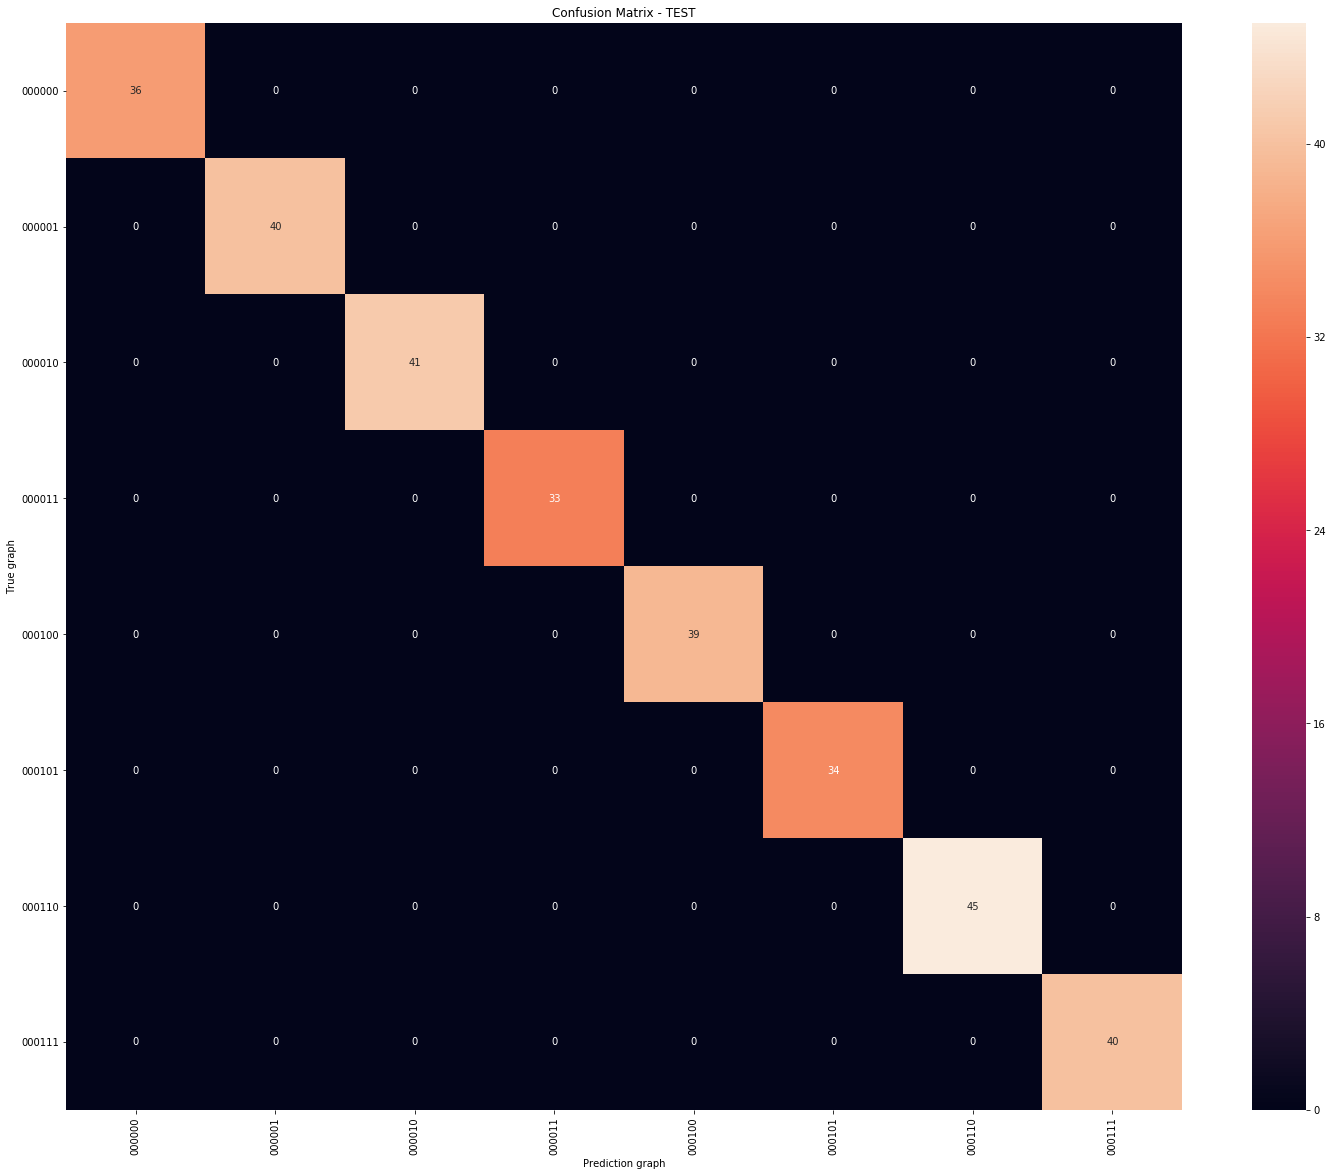

In [69]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../../DATASET-10_3/dataset9/result_param10-3-i2-test9.txt')

display(pd.DataFrame([("epocas",epocas), ("pTrain",pTrain), ("pHamm",pHamm), ("ac",ac)],columns=['Name','Value']))

labels = ['{0:06b}'.format(i) for i in range(2**3)]

cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');



In [70]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

         000       1.00      1.00      1.00        36
         001       1.00      1.00      1.00        40
         010       1.00      1.00      1.00        41
         011       1.00      1.00      1.00        33
         100       1.00      1.00      1.00        39
         101       1.00      1.00      1.00        34
         110       1.00      1.00      1.00        45
         111       1.00      1.00      1.00        40

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

